In [1]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 import scipy.stats as stats
 import pylab
 from sklearn.preprocessing import StandardScaler
 from sklearn.decomposition import PCA
 from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
 from sklearn.metrics import silhouette_score

In [5]:
df=pd.read_csv("CC GENERAL.csv")
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [7]:
df.shape

(8950, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

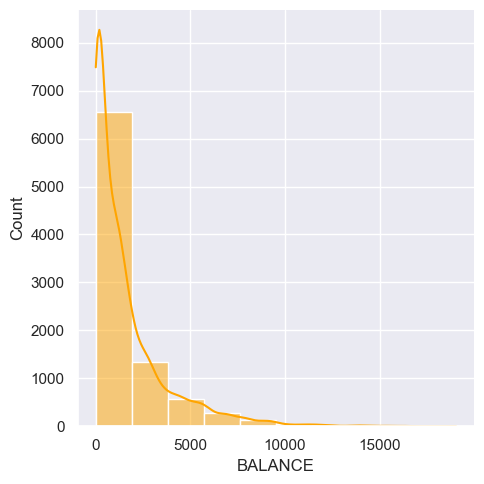

In [13]:
 sns.set(rc={"figure.figsize":(6,4)})
 sns.displot(df["BALANCE"], kde=True, color="orange", bins=10)

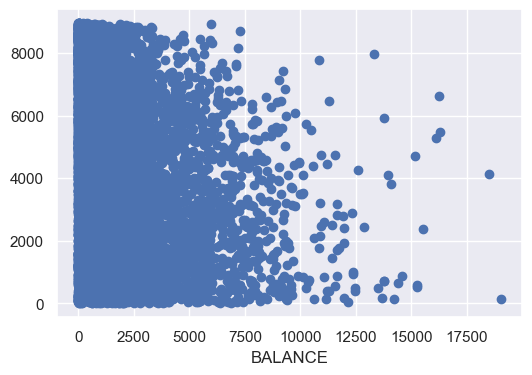

In [15]:
 plt.figure(figsize=(6,4))
 plt.scatter(x=df['BALANCE'], y=df.index)
 plt.xlabel("BALANCE")
 plt.show()

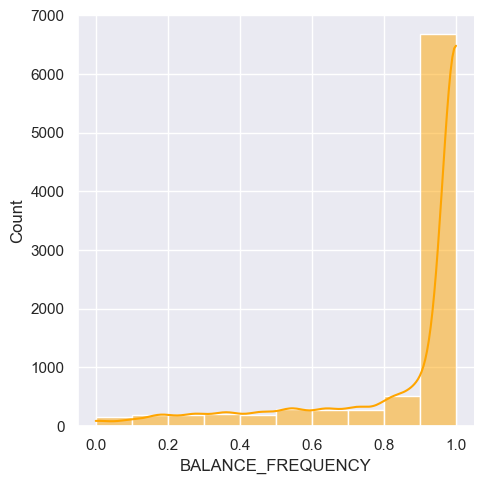

In [17]:
 sns.set(rc={"figure.figsize":(6,4)})
 sns.displot(df["BALANCE_FREQUENCY"], kde=True, color="orange", bins=10)

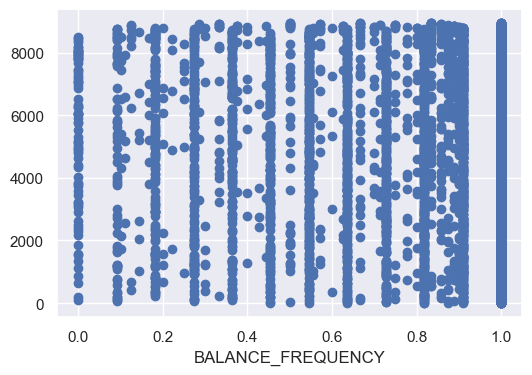

In [19]:
 plt.figure(figsize=(6,4))
 plt.scatter(x=df['BALANCE_FREQUENCY'], y=df.index)
 plt.xlabel("BALANCE_FREQUENCY")
 plt.show()

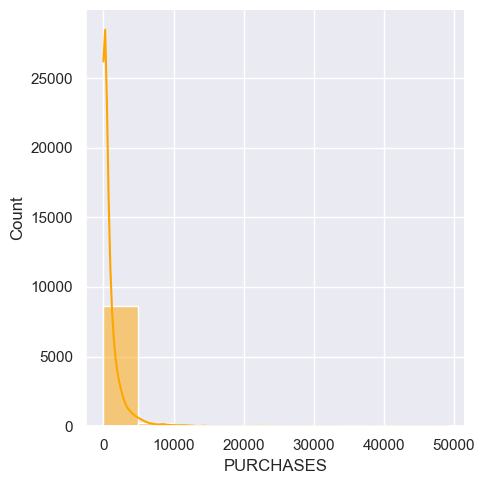

In [23]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["PURCHASES"], kde=True, color="orange", bins=10)

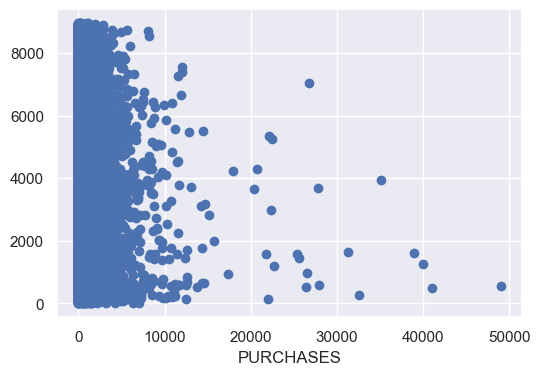

In [25]:
 plt.figure(figsize=(6,4))
 plt.scatter(x=df['PURCHASES'], y=df.index)
 plt.xlabel("PURCHASES")
 plt.show()

In [27]:
df["PURCHASES"].value_counts()

PURCHASES
0.00       2044
45.65        27
60.00        16
150.00       16
300.00       13
           ... 
222.70        1
433.20        1
509.88        1
65.50         1
1093.25       1
Name: count, Length: 6203, dtype: int64

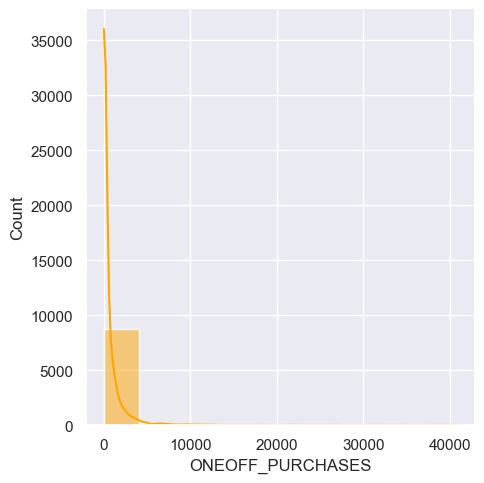

In [29]:
 sns.set(rc={"figure.figsize":(6,4)})
 sns.displot(df["ONEOFF_PURCHASES"], kde=True, color="orange", bins=10)

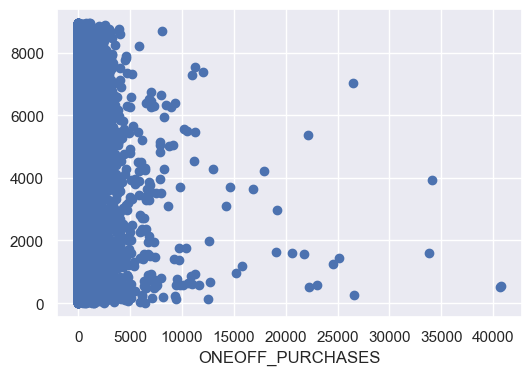

In [33]:
plt.figure(figsize=(6,4))
plt.scatter(x=df['ONEOFF_PURCHASES'], y=df.index)
plt.xlabel("ONEOFF_PURCHASES")
plt.show()

In [35]:
df["ONEOFF_PURCHASES"].value_counts()

ONEOFF_PURCHASES
0.00       4302
45.65        46
50.00        17
200.00       15
60.00        13
           ... 
187.00        1
229.02        1
1020.00       1
75.50         1
1093.25       1
Name: count, Length: 4014, dtype: int64

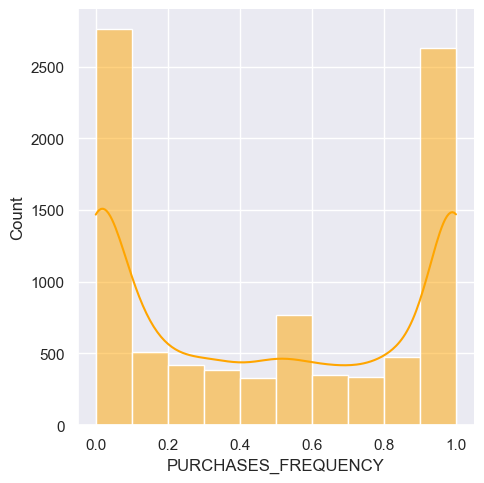

In [39]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["PURCHASES_FREQUENCY"], kde=True, color="orange", bins=10)

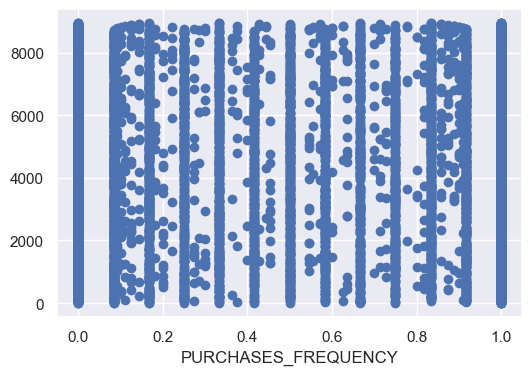

In [41]:
 plt.figure(figsize=(6,4))
 plt.scatter(x=df['PURCHASES_FREQUENCY'], y=df.index)
 plt.xlabel("PURCHASES_FREQUENCY")
 plt.show()

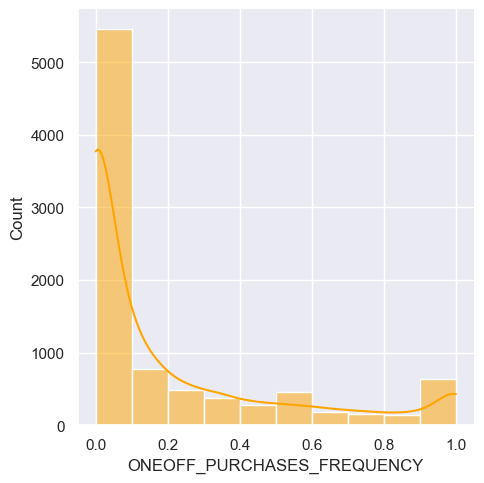

In [43]:
 sns.set(rc={"figure.figsize":(6,4)})
 sns.displot(df["ONEOFF_PURCHASES_FREQUENCY"], kde=True, color="orange", bins=10)

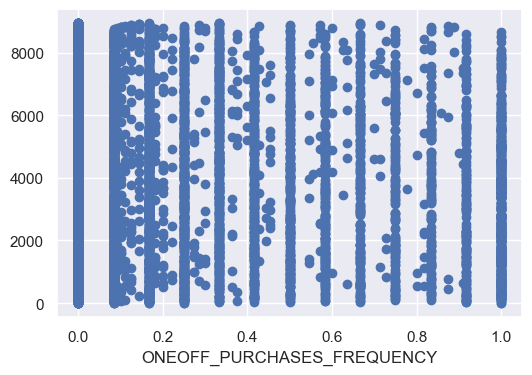

In [45]:
 plt.figure(figsize=(6,4))
 plt.scatter(x=df['ONEOFF_PURCHASES_FREQUENCY'], y=df.index)
 plt.xlabel("ONEOFF_PURCHASES_FREQUENCY")
 plt.show()

EDA (Exploratory Data Analysis)


Remove Duplicate


In [49]:
duplicate = df.duplicated()
print(duplicate.sum())

0


Check And Remove NaN Values

In [52]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [54]:
df["CREDIT_LIMIT"].value_counts()

CREDIT_LIMIT
3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
               ... 
9200.000000       1
13550.000000      1
7227.272727       1
11250.000000      1
1833.333333       1
Name: count, Length: 205, dtype: int64

In [56]:
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [58]:
df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [62]:
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].
mean())

In [64]:
df.isnull().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Remove Outlier

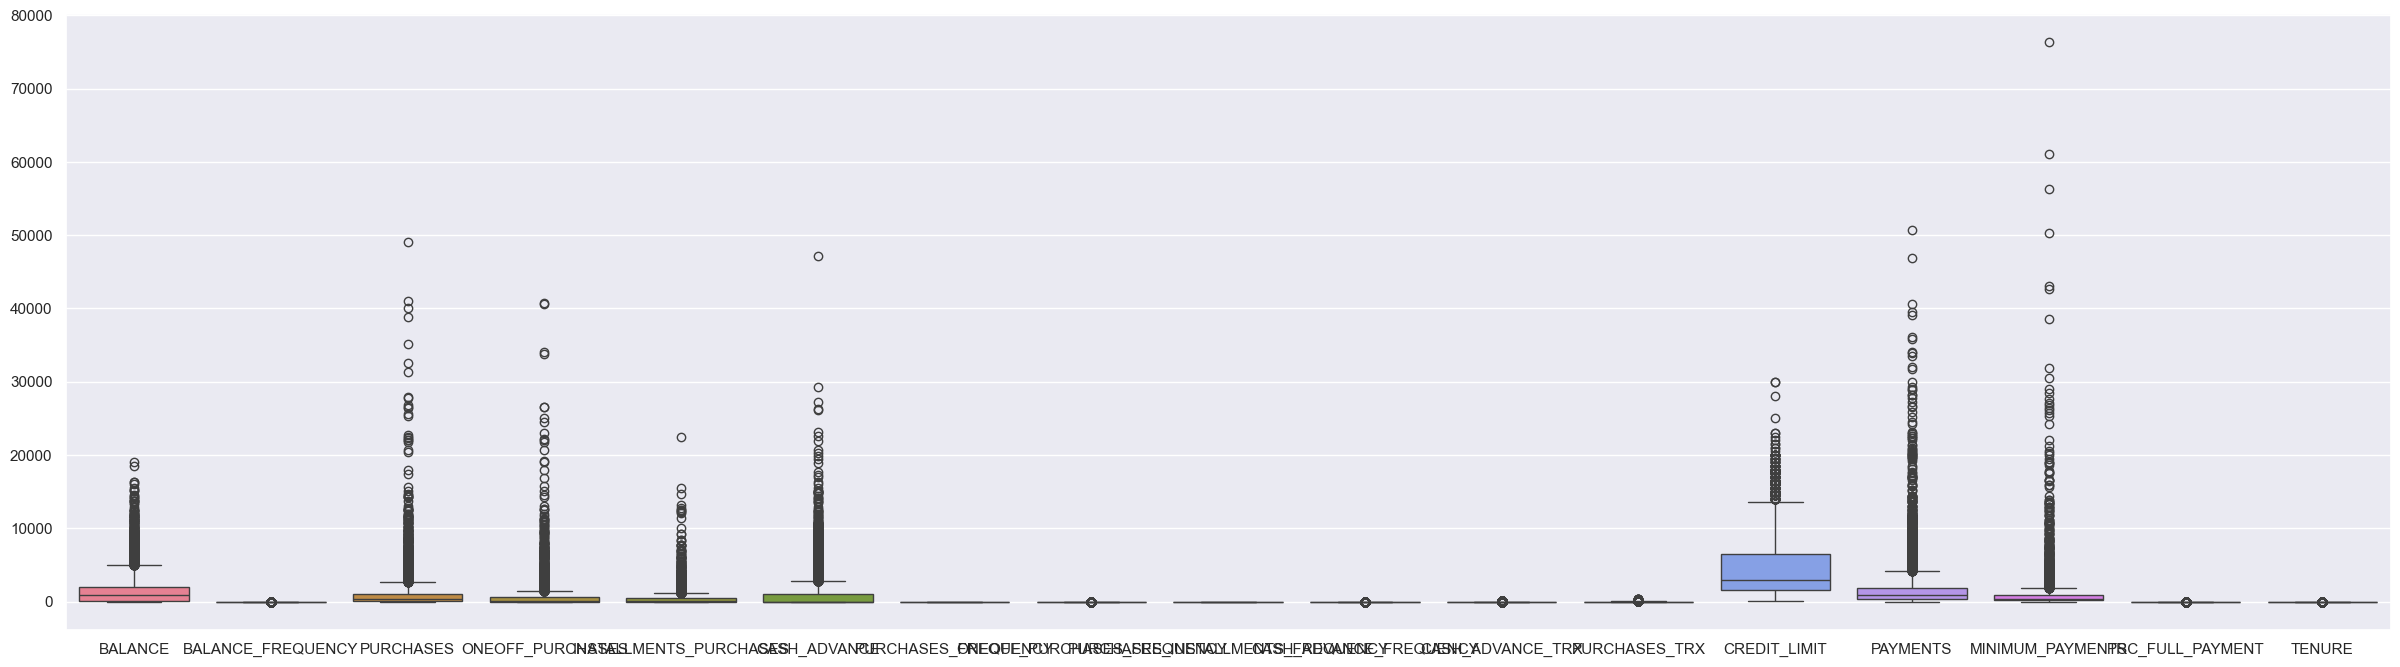

In [67]:
plt.figure(figsize=(30,8))
sns.boxplot(data=df)
plt.show()


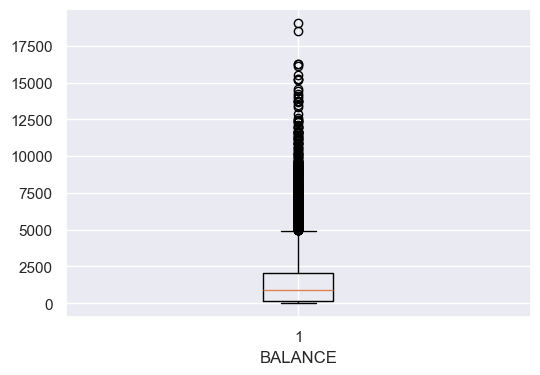

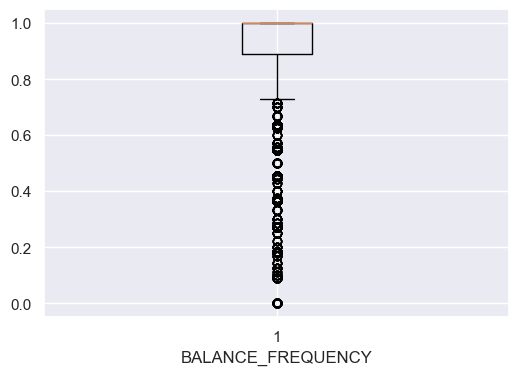

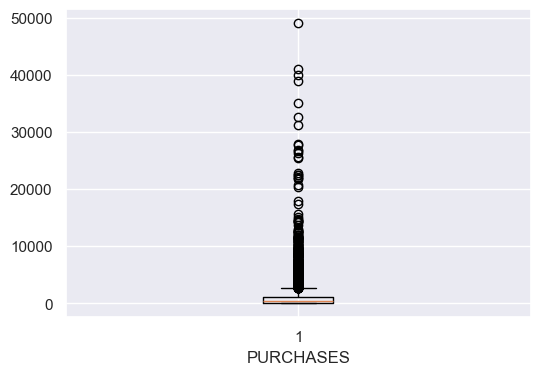

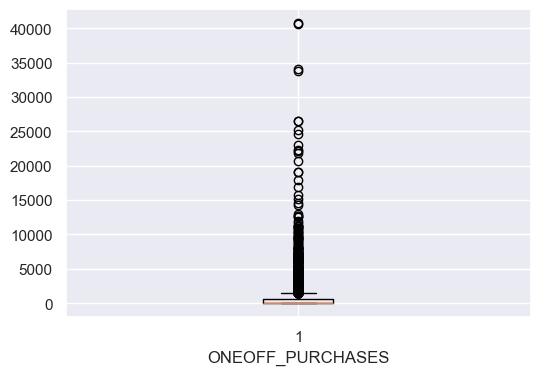

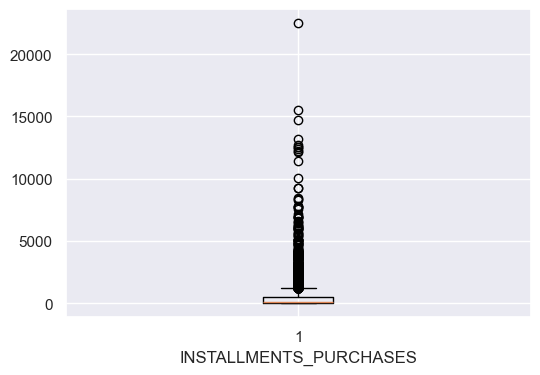

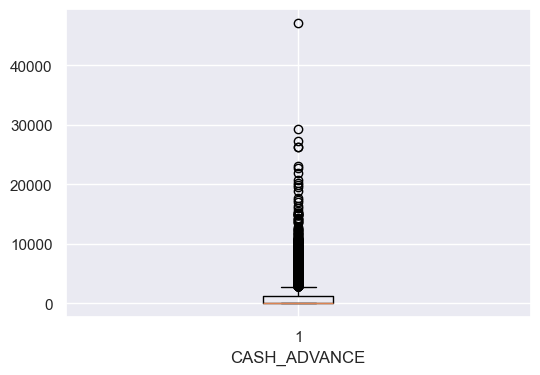

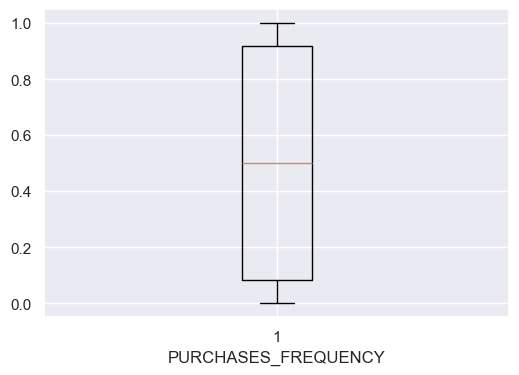

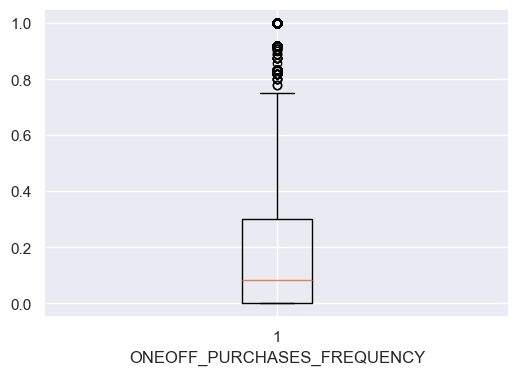

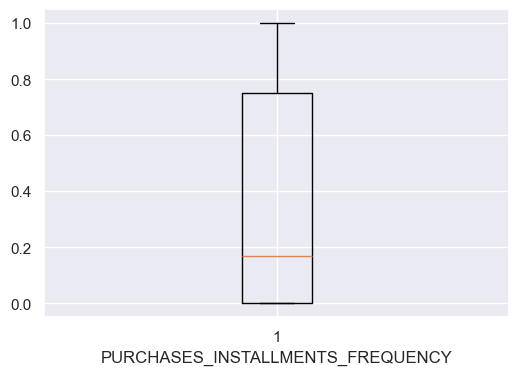

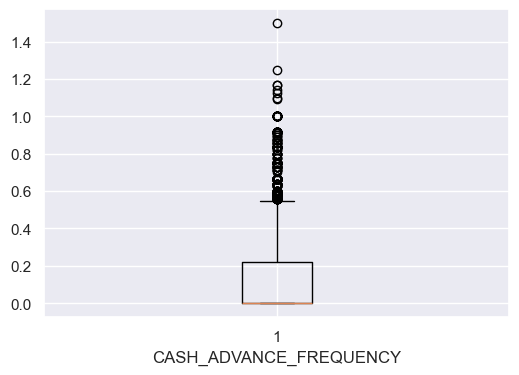

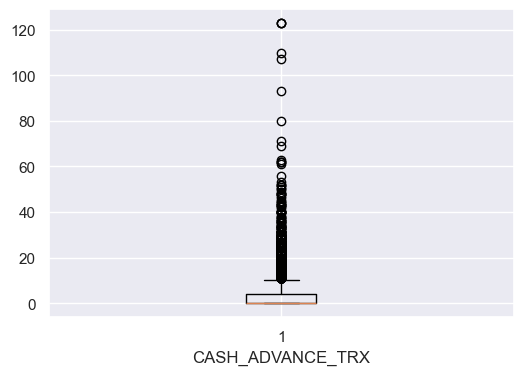

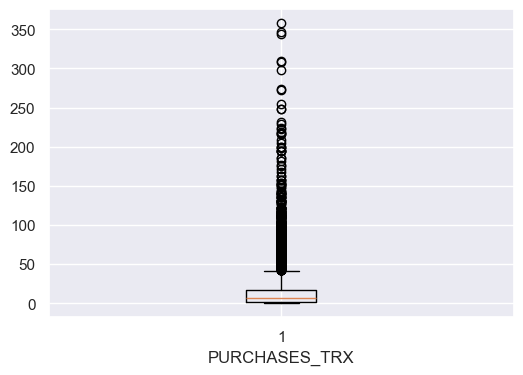

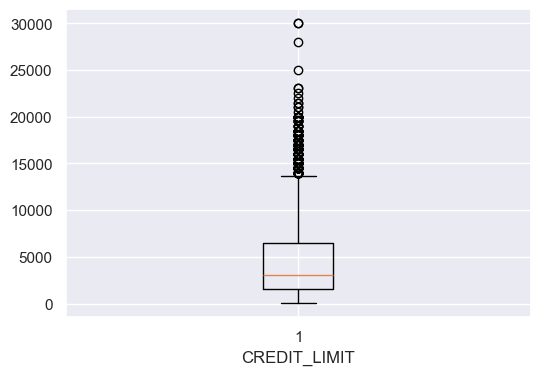

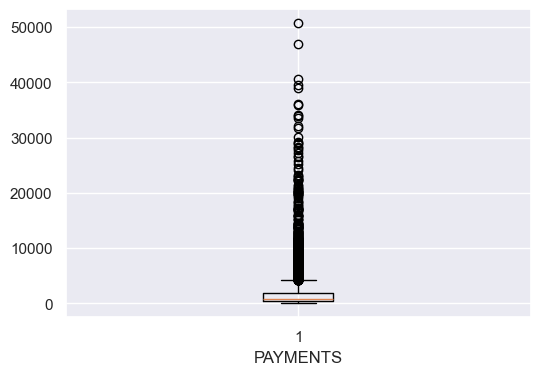

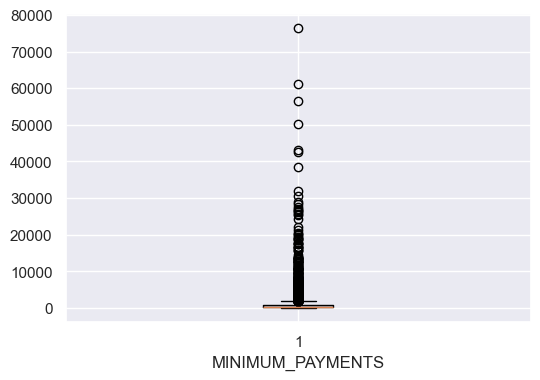

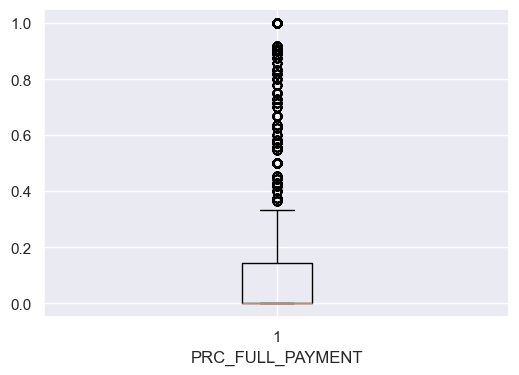

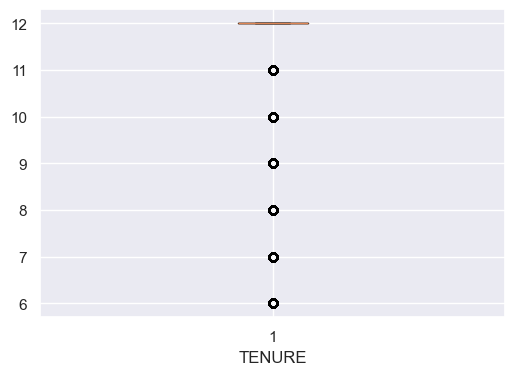

In [71]:
num_col = df.select_dtypes(["float64","int64"])
for i in num_col.columns:
  plt.boxplot(df[i])
  plt.xlabel(i)
  plt.show()


In [73]:
df["TENURE"].value_counts()

TENURE
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: count, dtype: int64

In [77]:
print(df.columns.get_loc('TENURE'))

17


In [79]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [81]:
num_col = df.select_dtypes(["float64","int64"])
for i in num_col.columns:
   if df.columns.get_loc(i) == 17:
     pass
   else:
     lower_range,upper_range = remove_outlier(df[i])
     df[i] = np.where(df[i] > upper_range, upper_range, df[i])
     df[i] = np.where(df[i] < lower_range, lower_range, df[i])

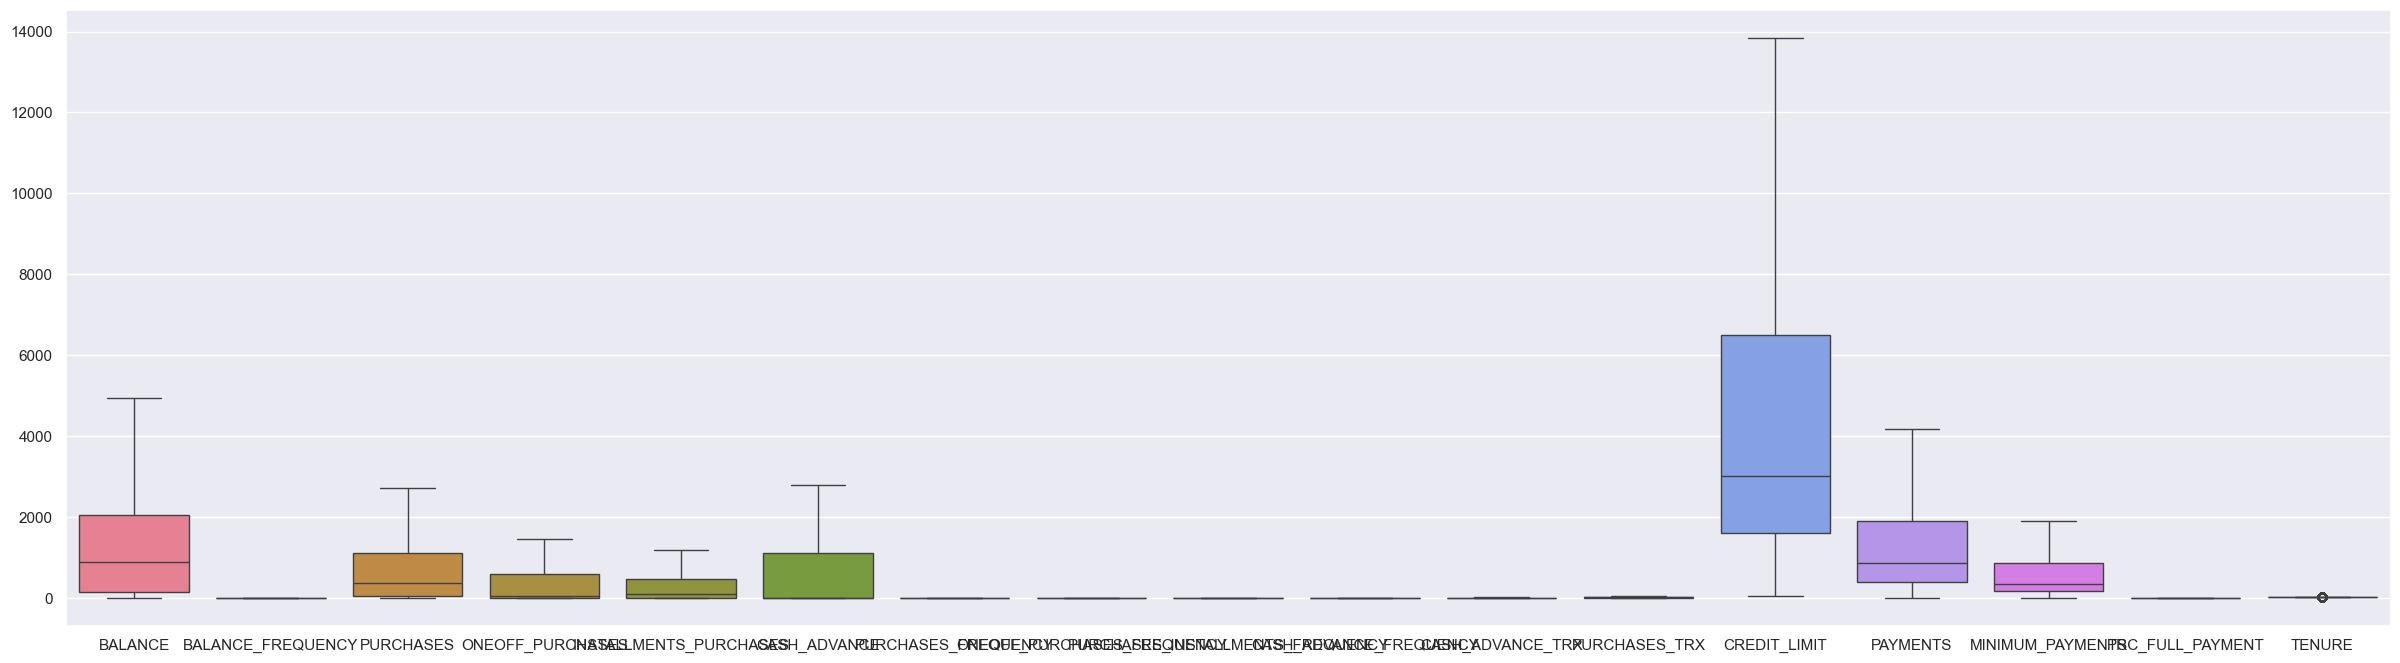

In [83]:
plt.figure(figsize=(30,8))
sns.boxplot(data=df)
plt.show()

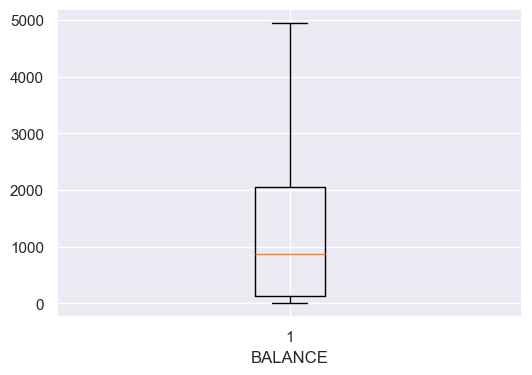

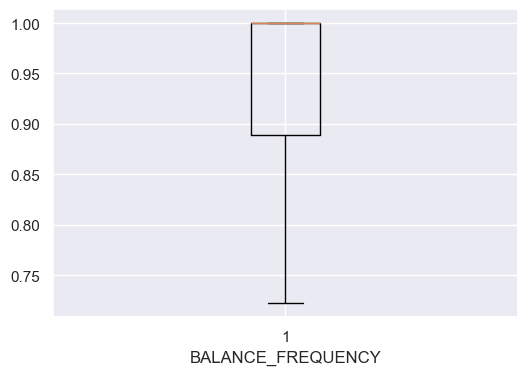

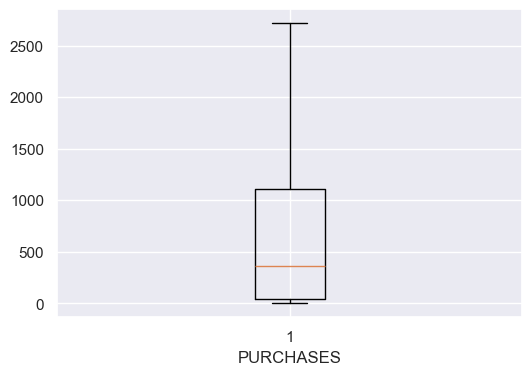

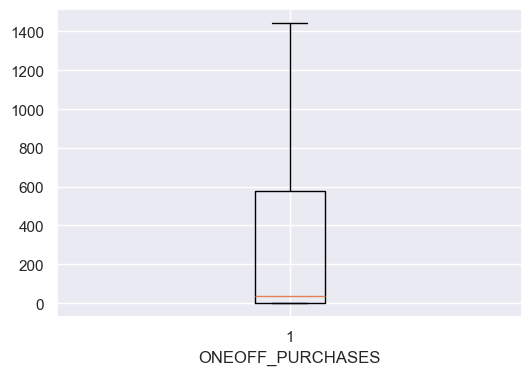

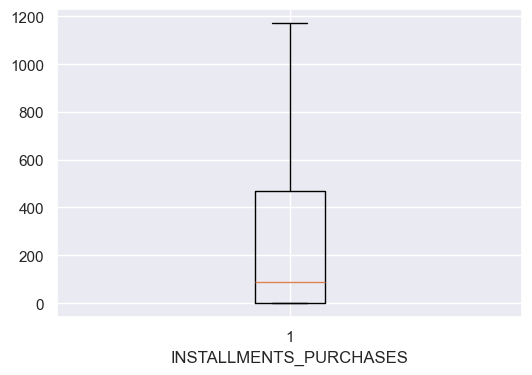

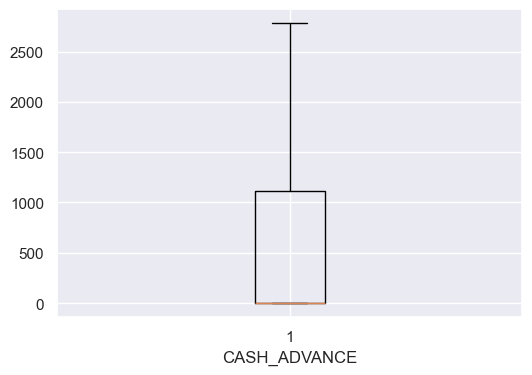

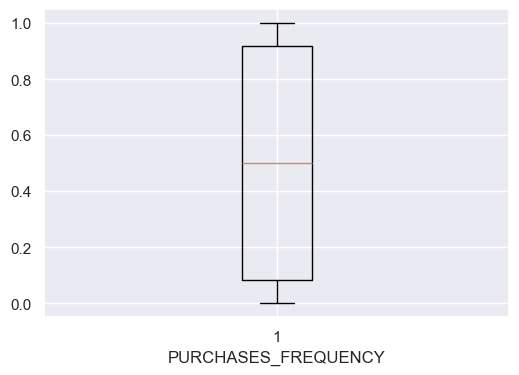

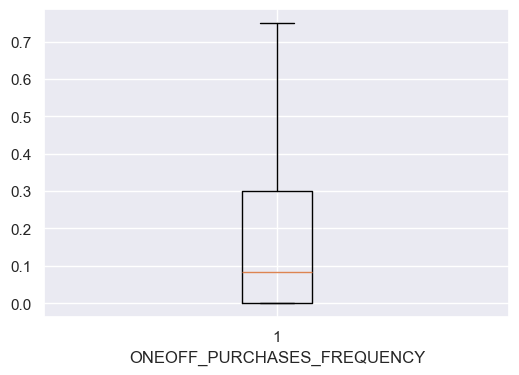

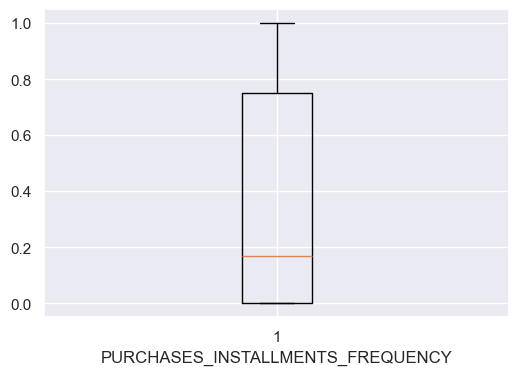

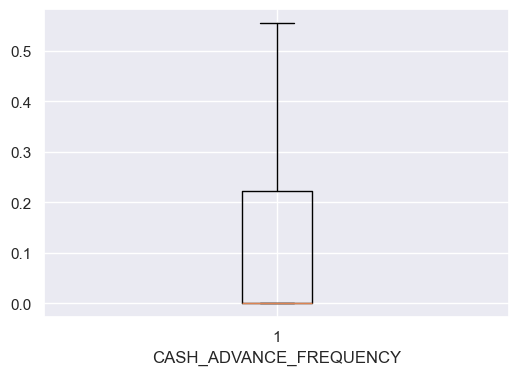

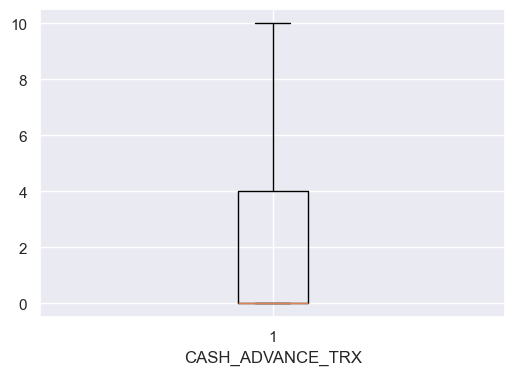

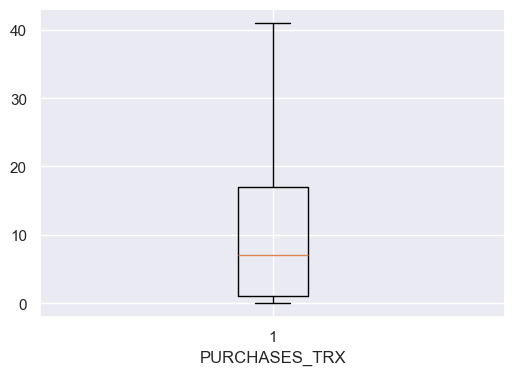

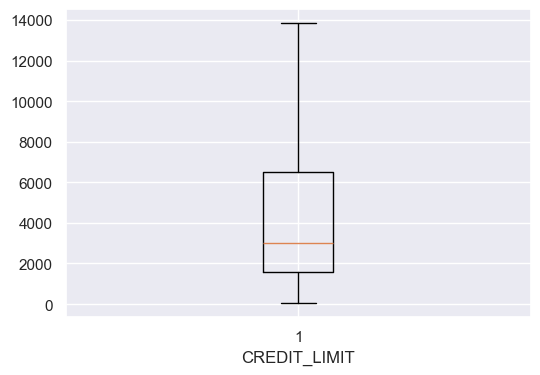

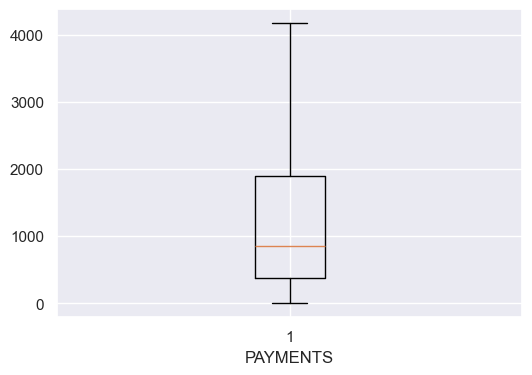

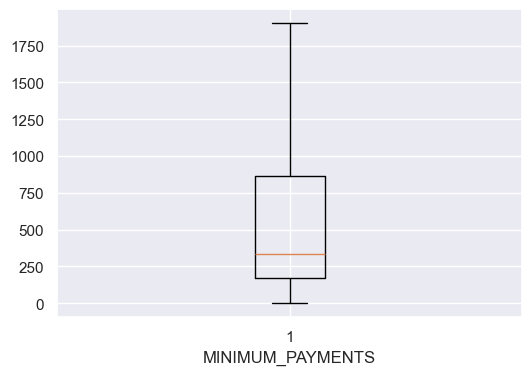

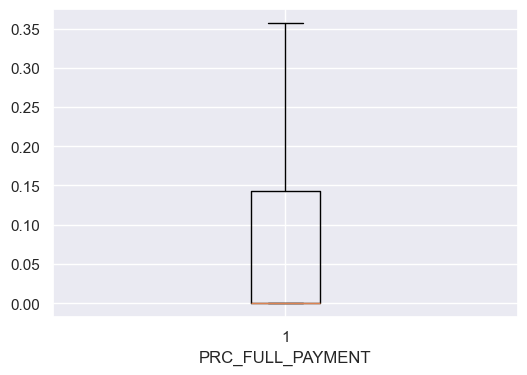

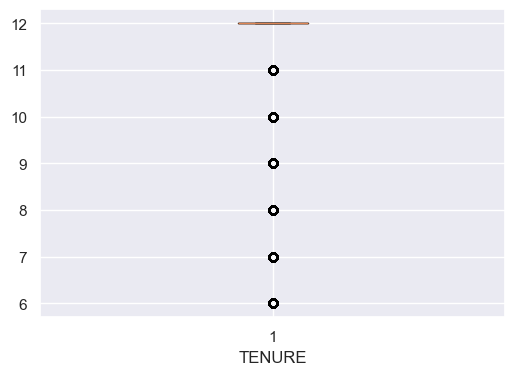

In [85]:
num_col = df.select_dtypes(["float64","int64"])
for i in num_col.columns:
  plt.boxplot(df[i])
  plt.xlabel(i)
  plt.show()


Bivariate Analysis

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   float64
 12  PURCHA

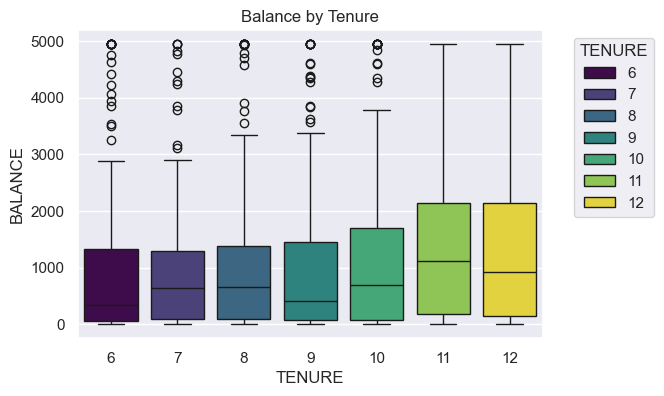

In [106]:
sns.boxplot(x='TENURE', y='BALANCE', data=df,hue="TENURE",palette="viridis")
plt.title('Balance by Tenure')
plt.xlabel("TENURE")
plt.legend(title='TENURE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("BALANCE")
plt.show()


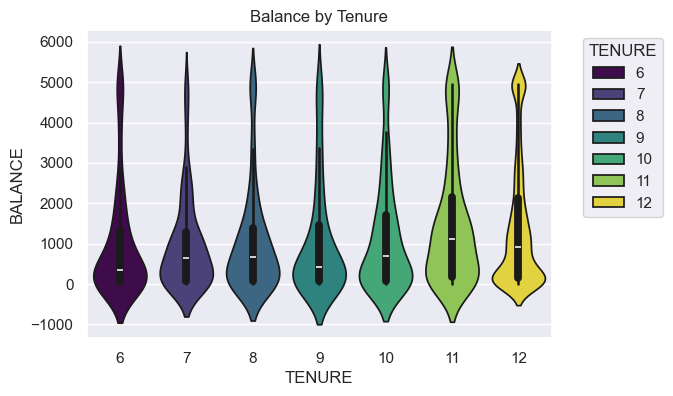

In [100]:
sns.violinplot(x='TENURE', y='BALANCE', data=df, hue='TENURE', palette='viridis')
plt.title('Balance by Tenure')
plt.legend(title='TENURE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

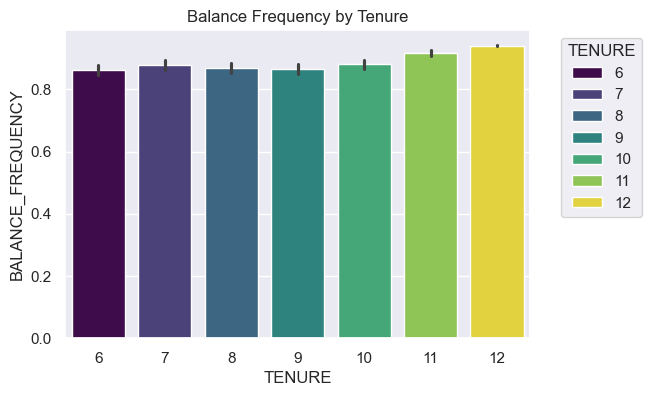

In [126]:
sns.barplot(x='TENURE', y='BALANCE_FREQUENCY', data=df,hue="TENURE",palette='viridis')
plt.title('Balance Frequency by Tenure')
plt.legend(title='TENURE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


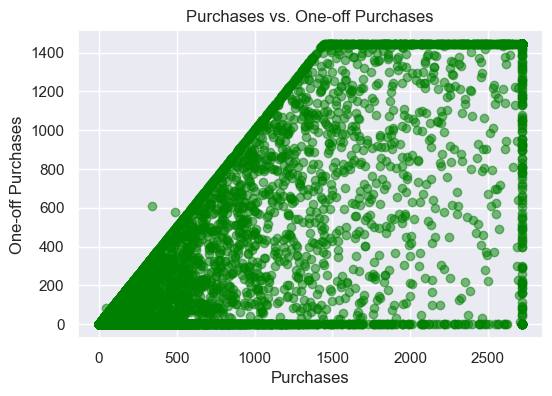

In [114]:
plt.scatter(df['PURCHASES'], df['ONEOFF_PURCHASES'], alpha=0.5, color='green')
plt.xlabel('Purchases')
plt.ylabel('One-off Purchases')
plt.title('Purchases vs. One-off Purchases')
plt.show()

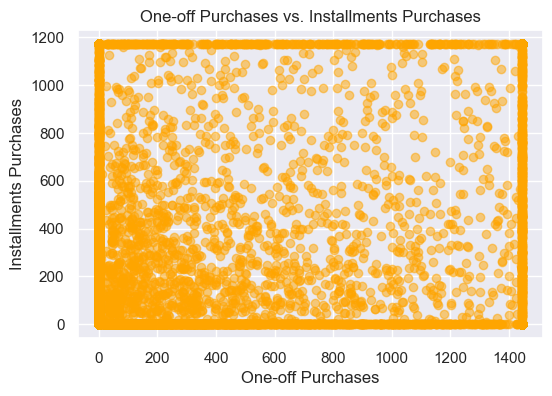

In [116]:
plt.scatter(df['ONEOFF_PURCHASES'], df['INSTALLMENTS_PURCHASES'], alpha=0.5,color='orange')
plt.xlabel('One-off Purchases')
plt.ylabel('Installments Purchases')
plt.title('One-off Purchases vs. Installments Purchases')
plt.show()

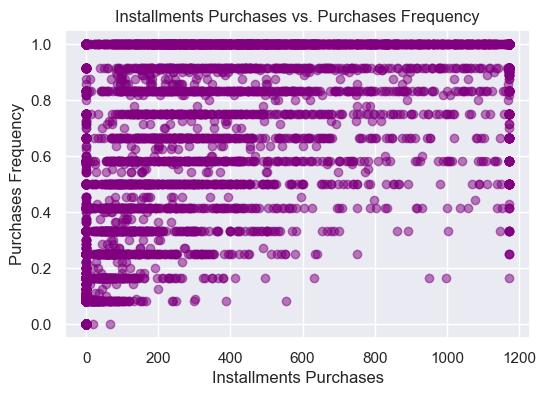

In [120]:
 plt.scatter(df['INSTALLMENTS_PURCHASES'], df['PURCHASES_FREQUENCY'], alpha=0.5,color='purple')
plt.xlabel('Installments Purchases')
plt.ylabel('Purchases Frequency')
plt.title('Installments Purchases vs. Purchases Frequency')
plt.show()

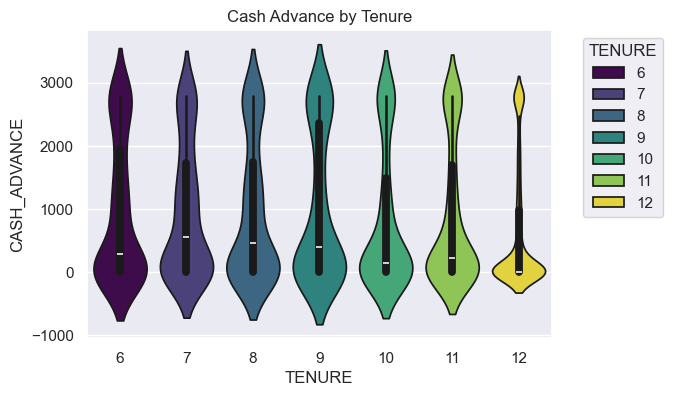

In [128]:
sns.violinplot(x='TENURE', y='CASH_ADVANCE', data=df,hue="TENURE",palette="viridis")
plt.title('Cash Advance by Tenure')
plt.legend(title='TENURE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


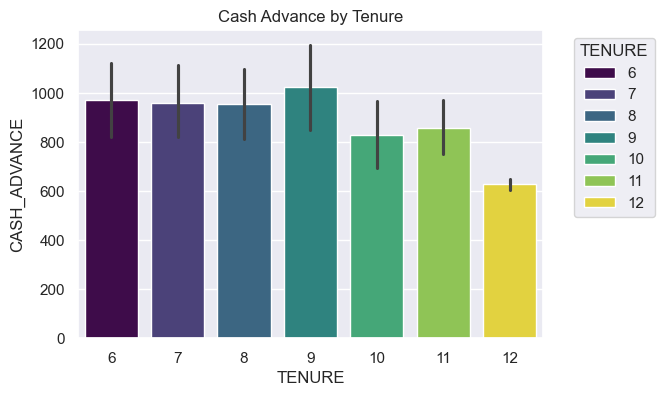

In [130]:
sns.barplot(x='TENURE', y='CASH_ADVANCE', data=df,hue="TENURE",palette="viridis")
plt.title('Cash Advance by Tenure')
plt.legend(title='TENURE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


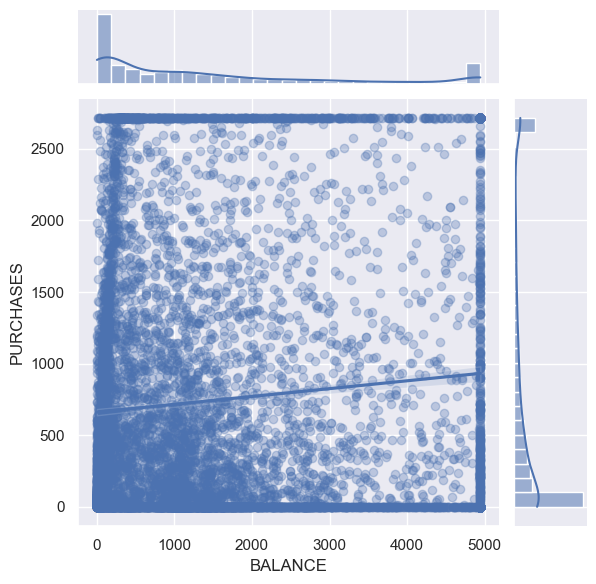

In [132]:
sns.jointplot(x='BALANCE', y='PURCHASES', data=df, kind='reg',scatter_kws={'alpha':0.3})
plt.show()


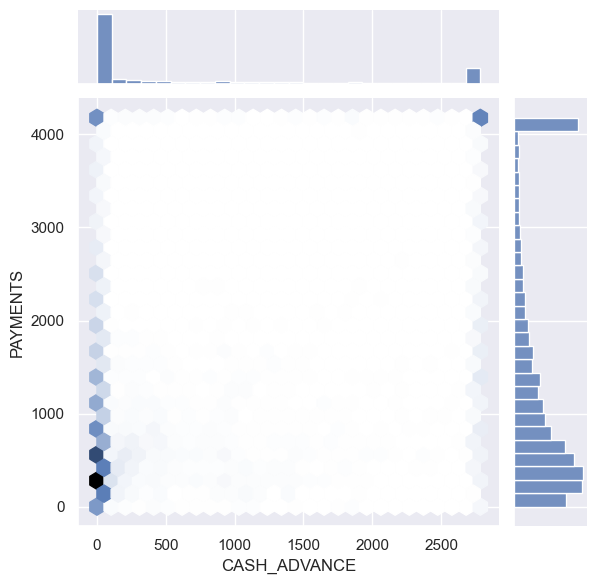

In [134]:
sns.jointplot(x='CASH_ADVANCE', y='PAYMENTS', data=df, kind='hex')
plt.show()


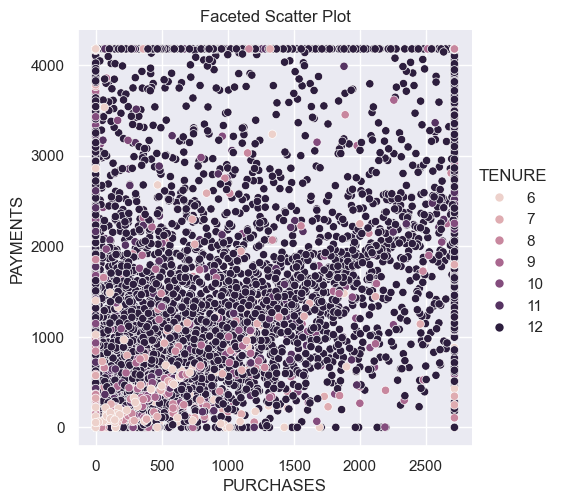

In [136]:
sns.relplot(x='PURCHASES', y='PAYMENTS', hue='TENURE', data=df)
plt.title('Faceted Scatter Plot')
plt.show()


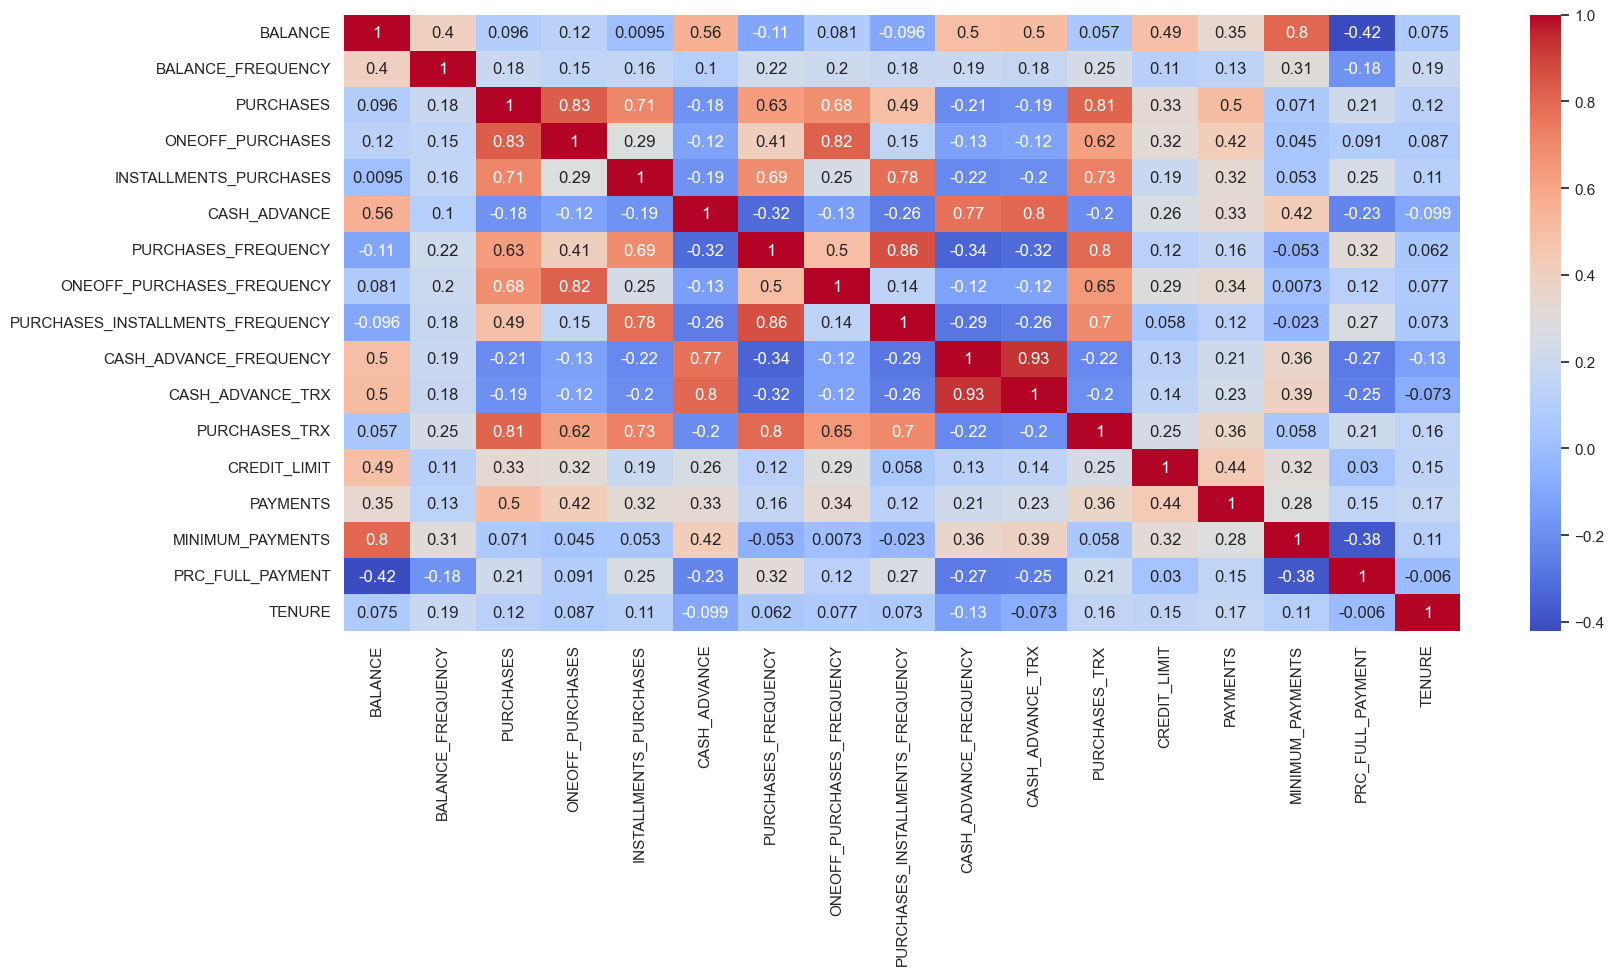

In [142]:
numeric_df = df.select_dtypes(include='number')
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', ax=ax)

plt.show()

C:\Users\saiso\AppData\Local\Temp\ipykernel_27004\3632009477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


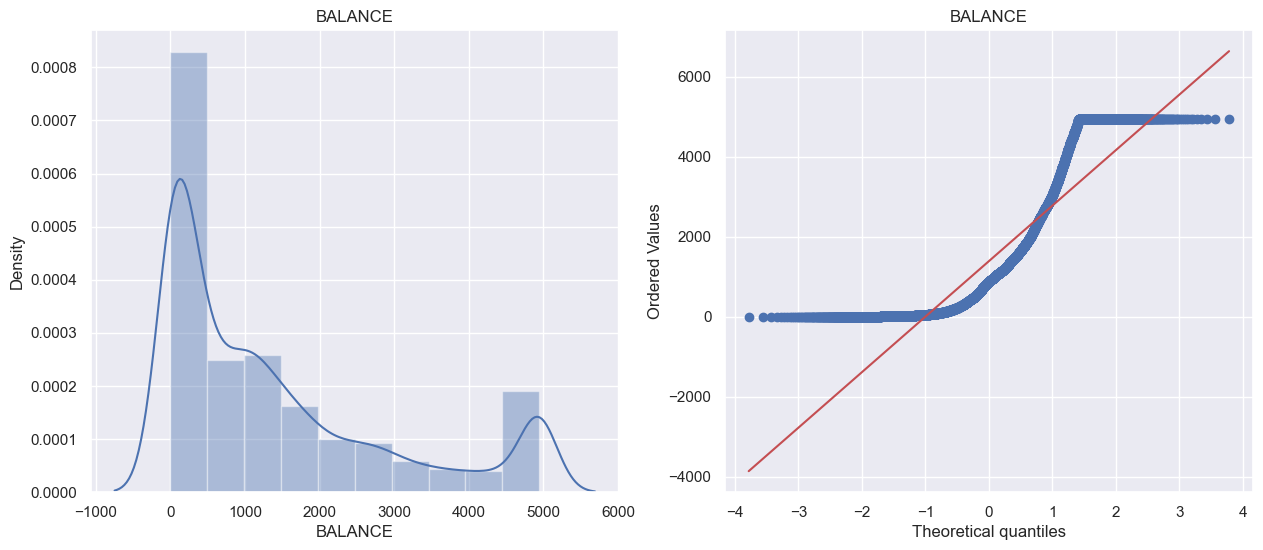

C:\Users\saiso\AppData\Local\Temp\ipykernel_27004\3632009477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


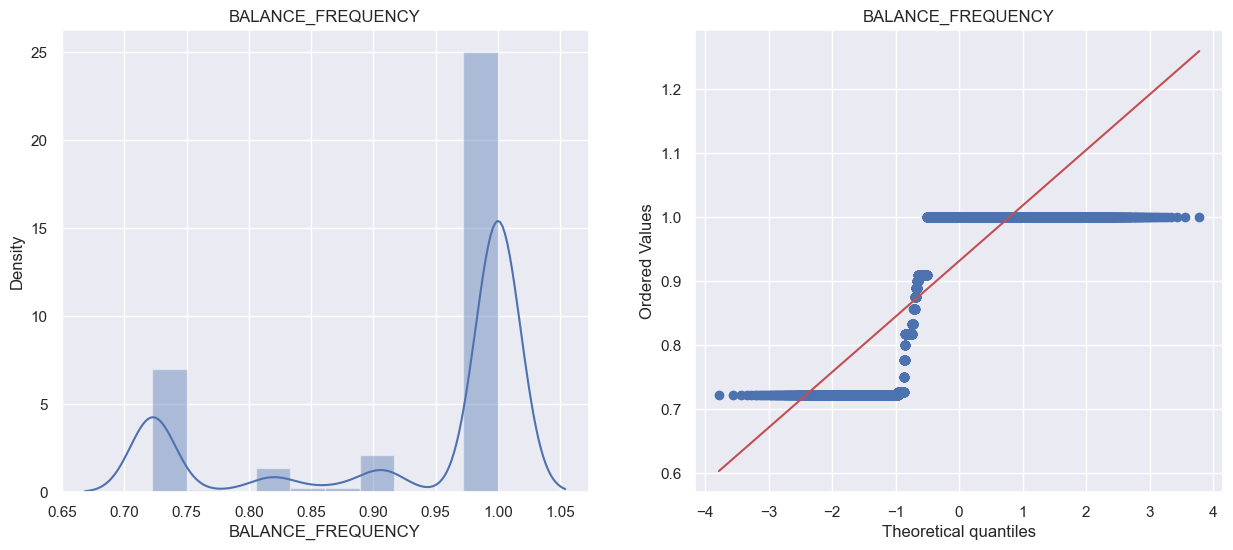

C:\Users\saiso\AppData\Local\Temp\ipykernel_27004\3632009477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


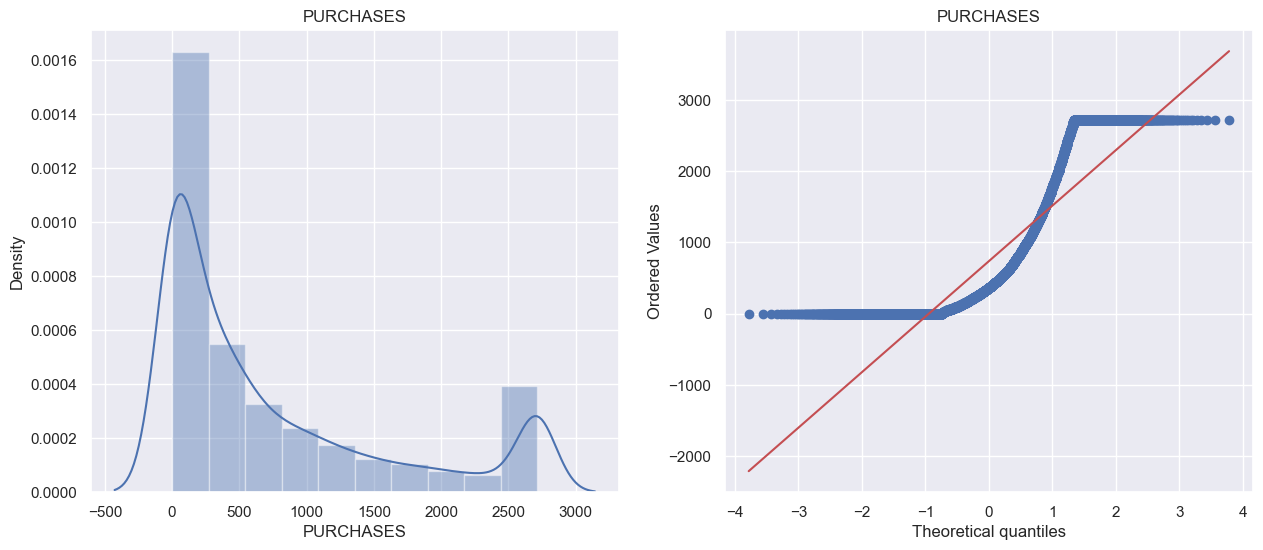

C:\Users\saiso\AppData\Local\Temp\ipykernel_27004\3632009477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


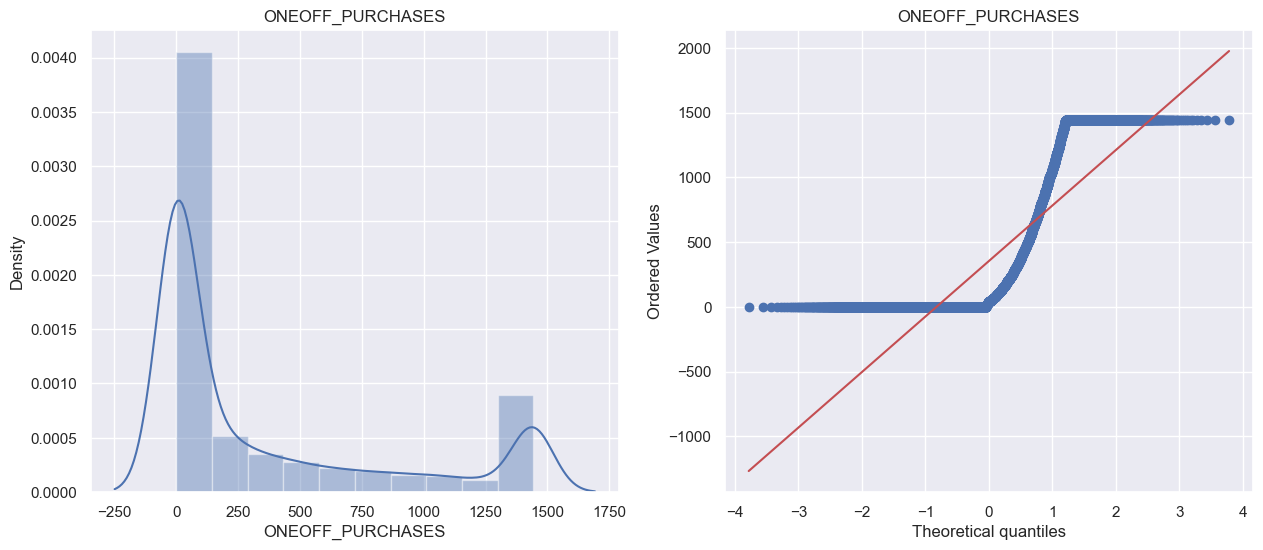

C:\Users\saiso\AppData\Local\Temp\ipykernel_27004\3632009477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


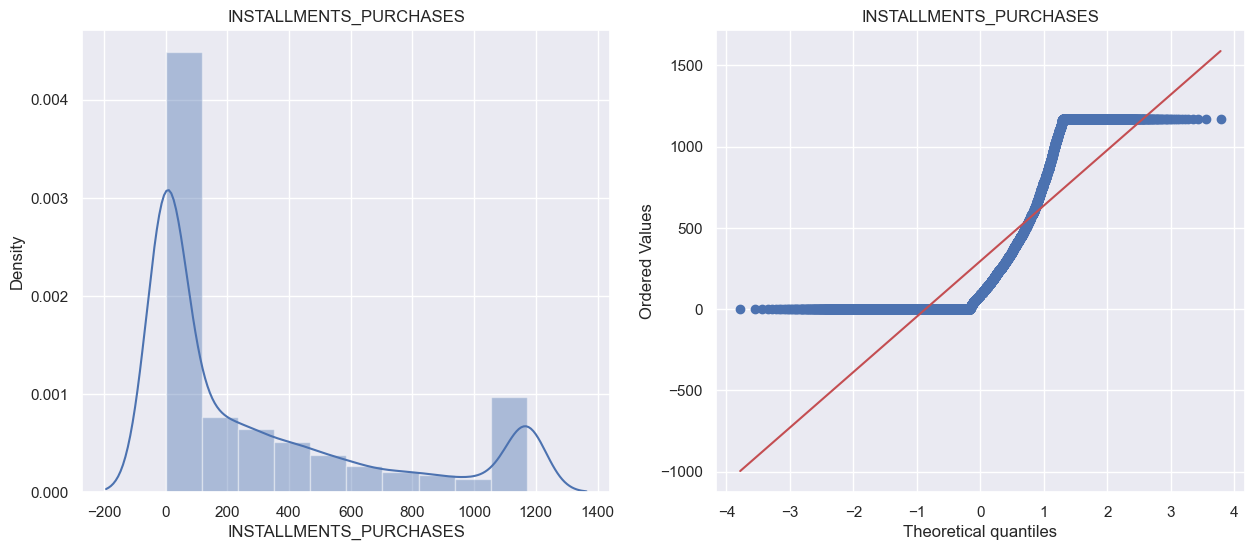

C:\Users\saiso\AppData\Local\Temp\ipykernel_27004\3632009477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


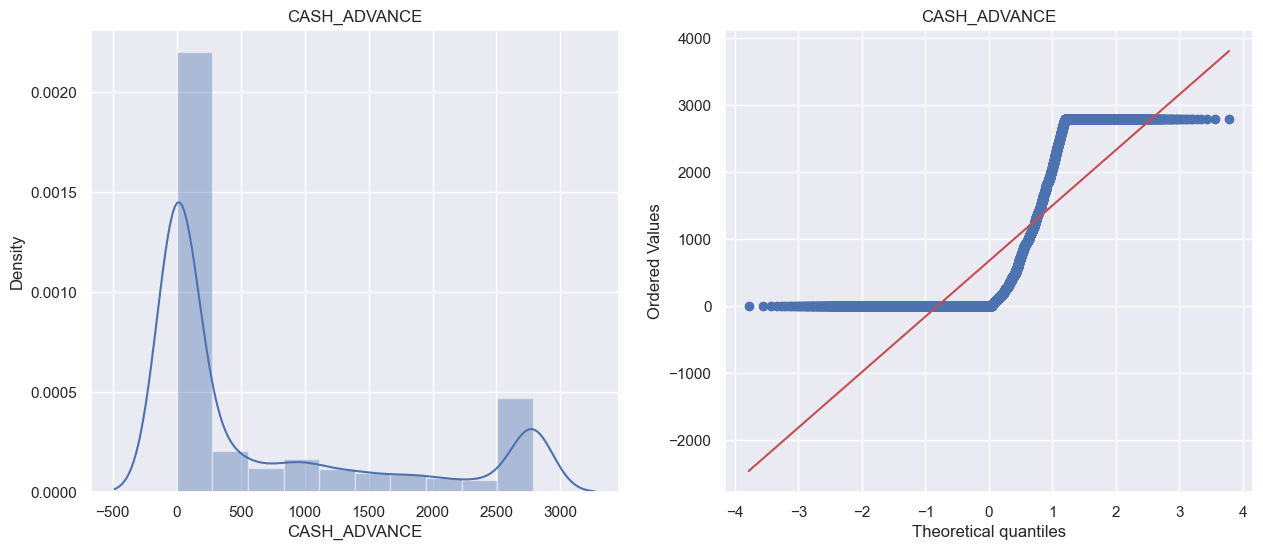

C:\Users\saiso\AppData\Local\Temp\ipykernel_27004\3632009477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


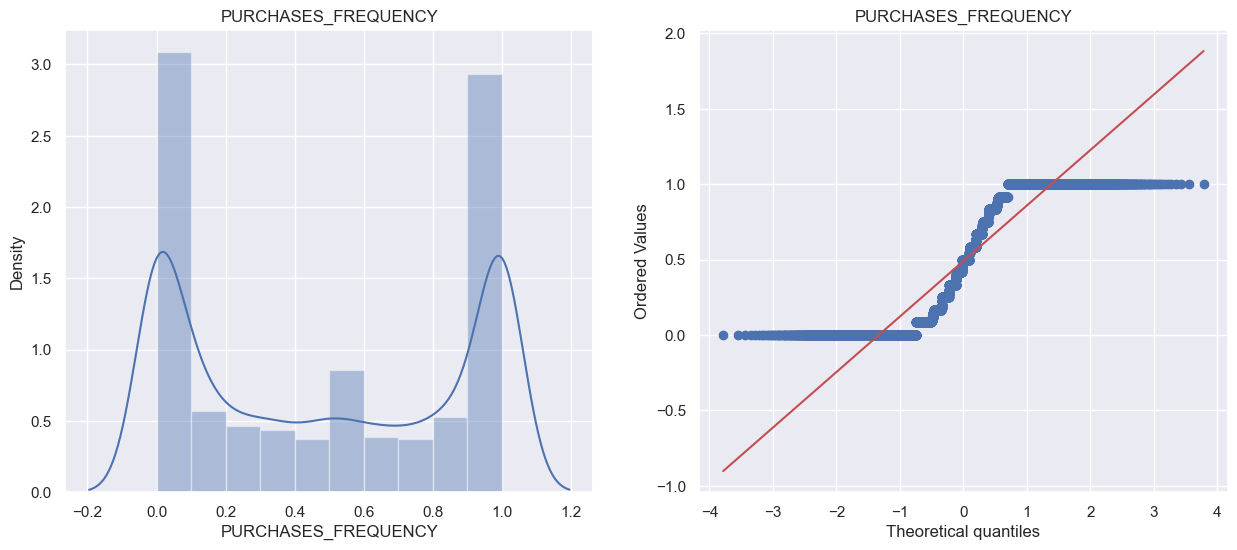

C:\Users\saiso\AppData\Local\Temp\ipykernel_27004\3632009477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


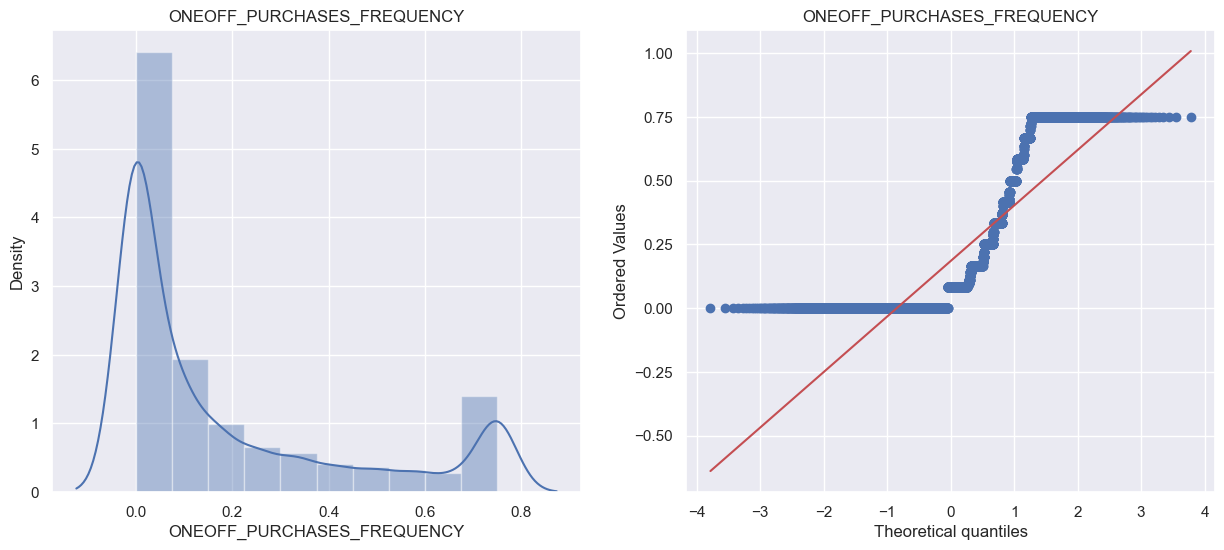

C:\Users\saiso\AppData\Local\Temp\ipykernel_27004\3632009477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


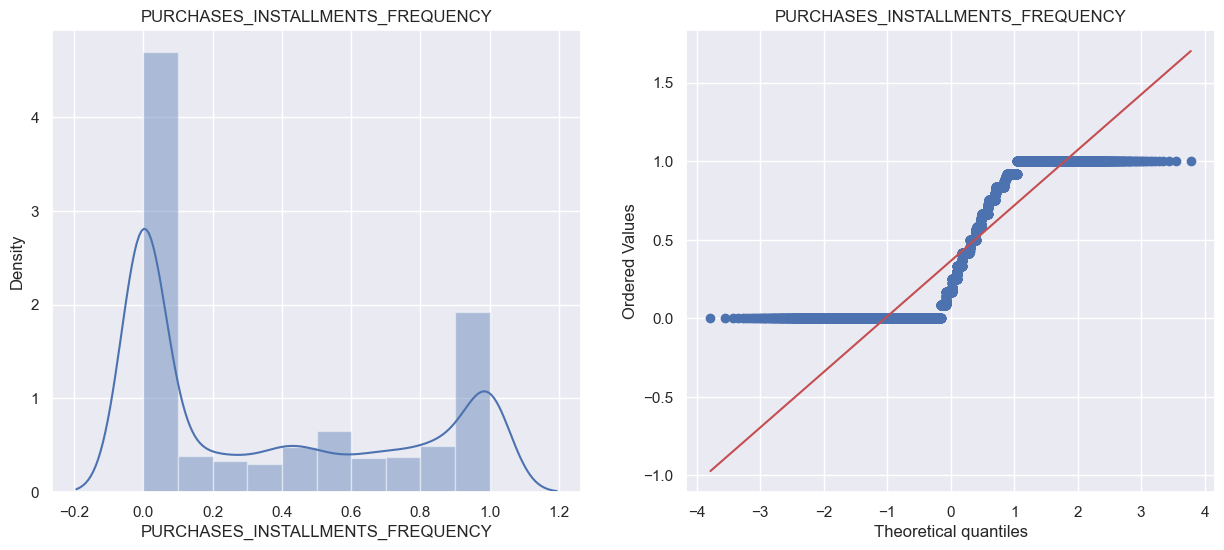

C:\Users\saiso\AppData\Local\Temp\ipykernel_27004\3632009477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


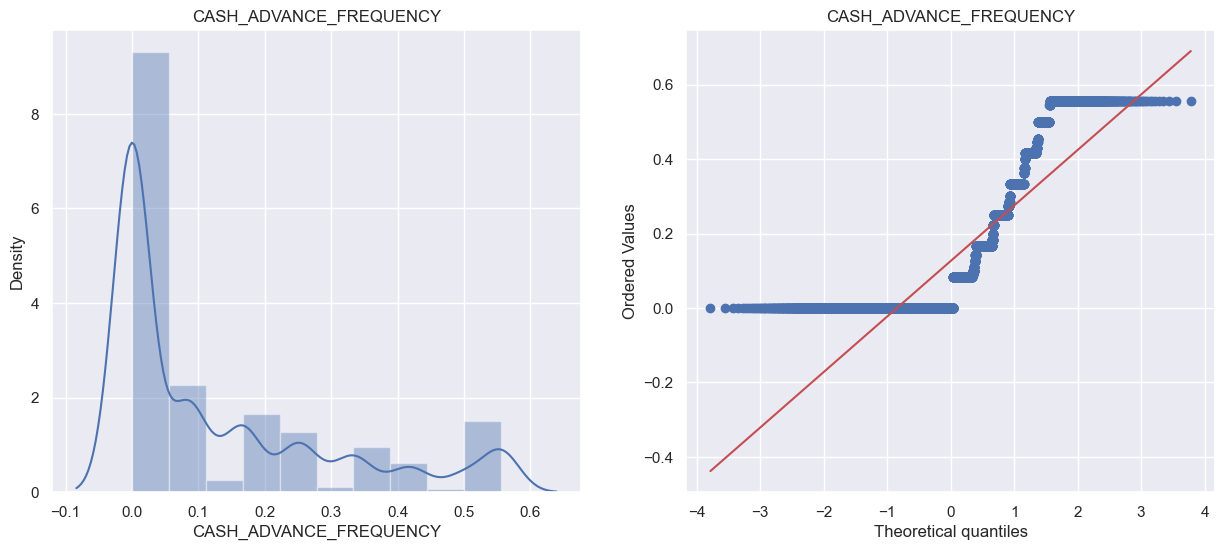

C:\Users\saiso\AppData\Local\Temp\ipykernel_27004\3632009477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


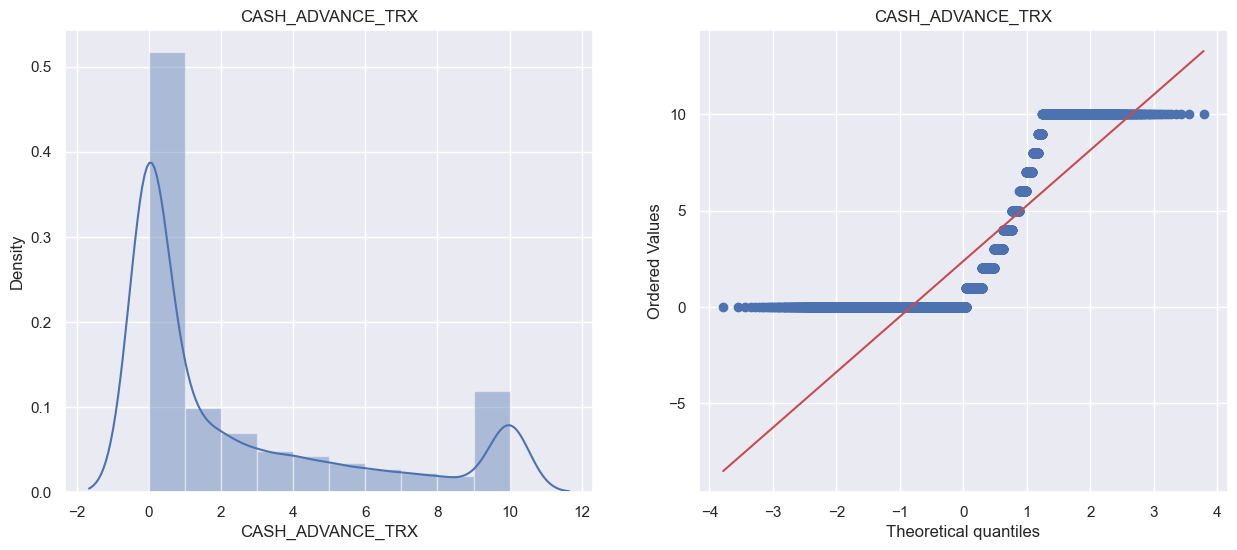

C:\Users\saiso\AppData\Local\Temp\ipykernel_27004\3632009477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


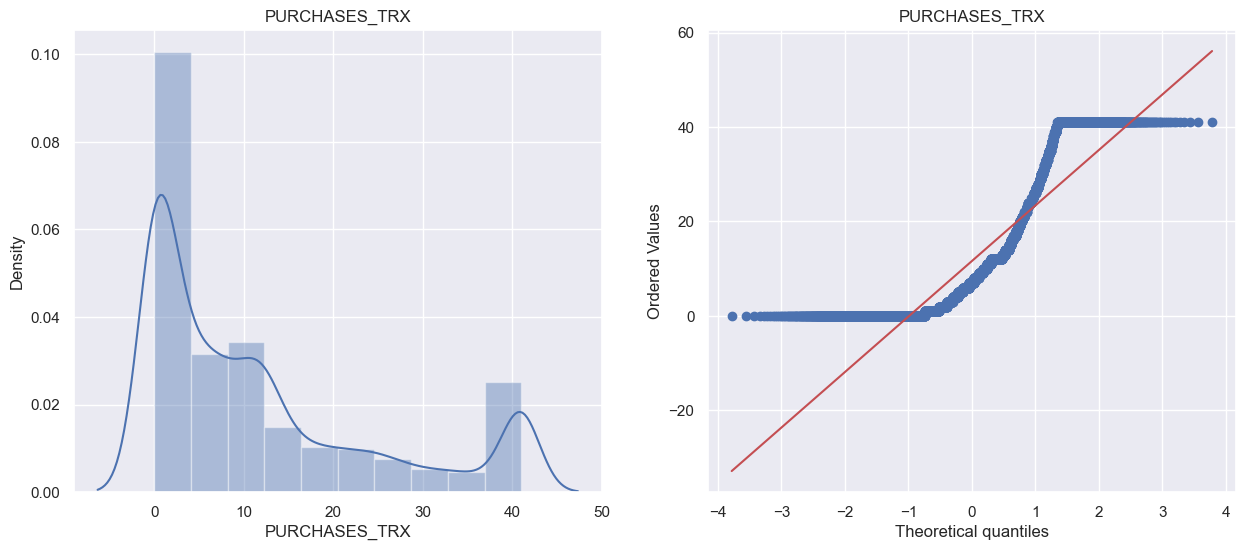

C:\Users\saiso\AppData\Local\Temp\ipykernel_27004\3632009477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


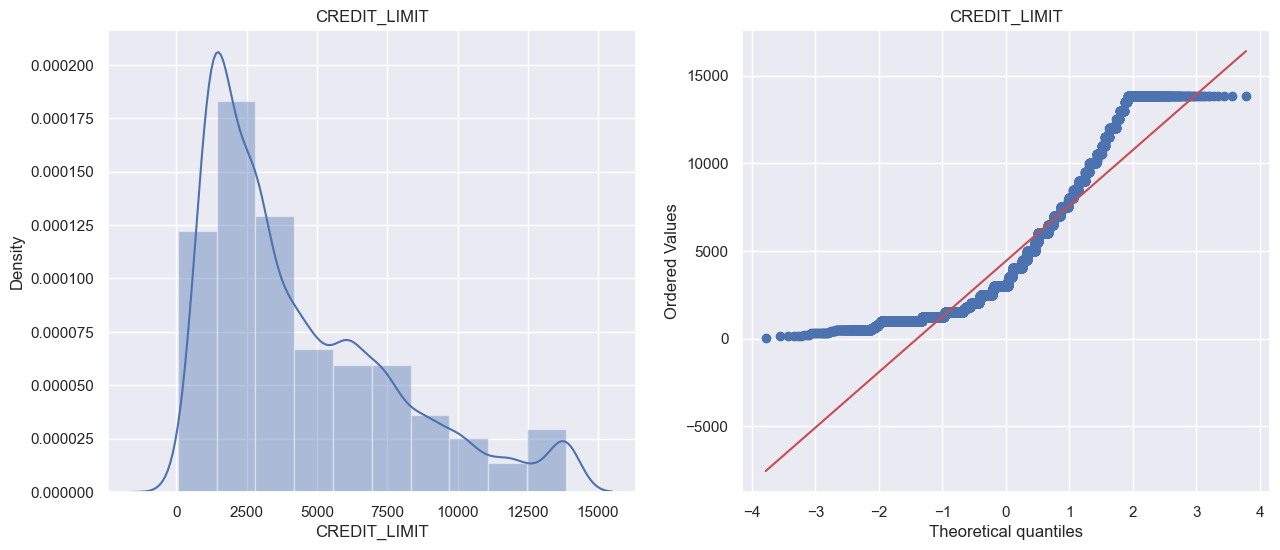

C:\Users\saiso\AppData\Local\Temp\ipykernel_27004\3632009477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


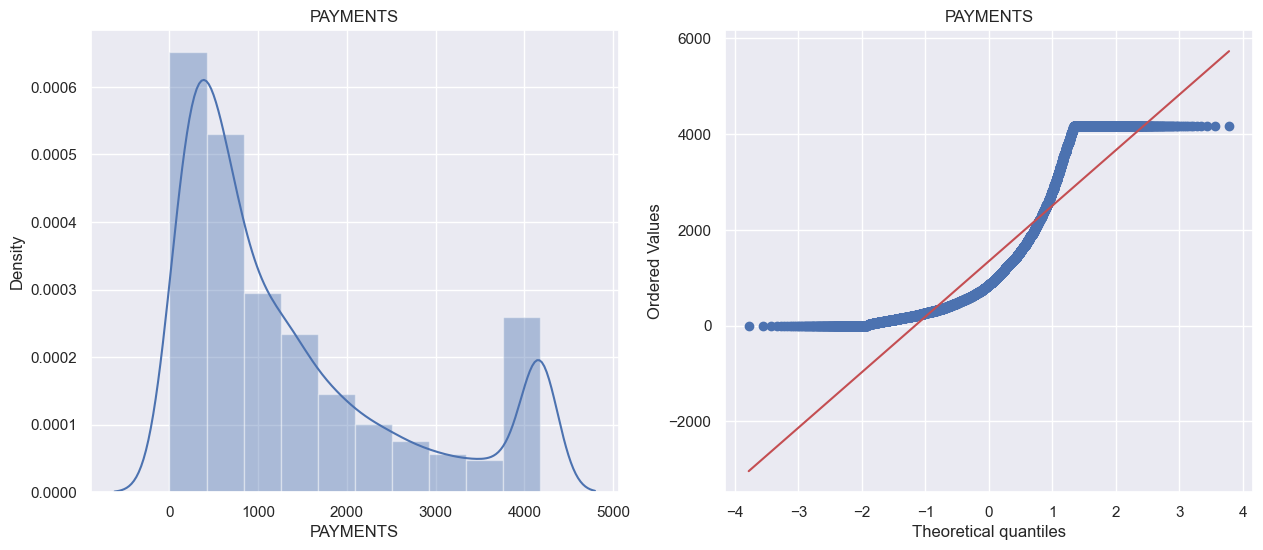

C:\Users\saiso\AppData\Local\Temp\ipykernel_27004\3632009477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


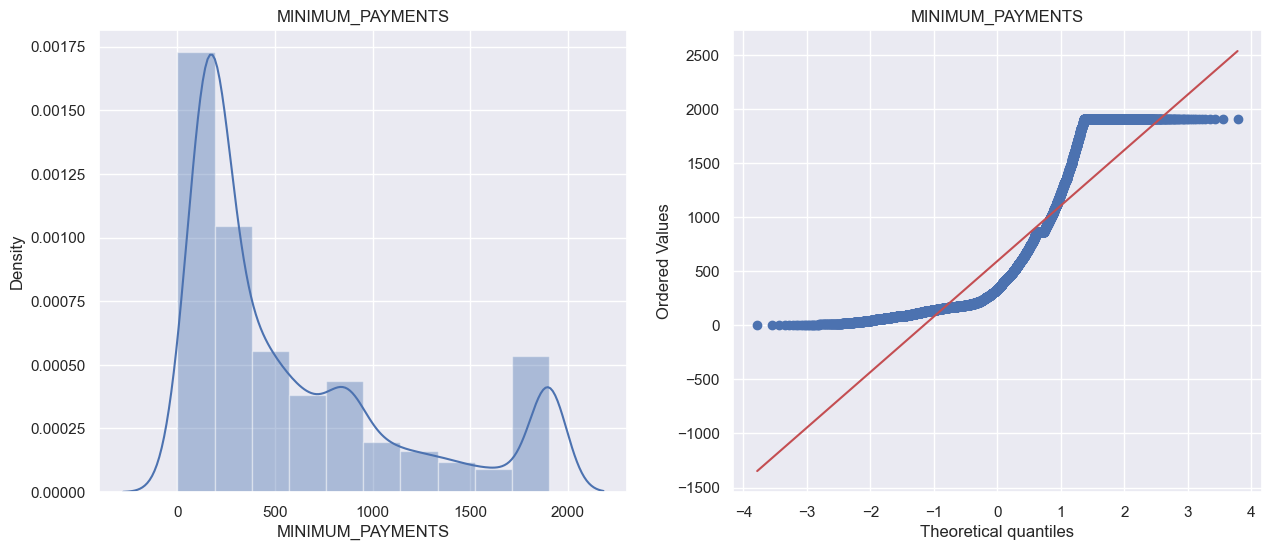

C:\Users\saiso\AppData\Local\Temp\ipykernel_27004\3632009477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


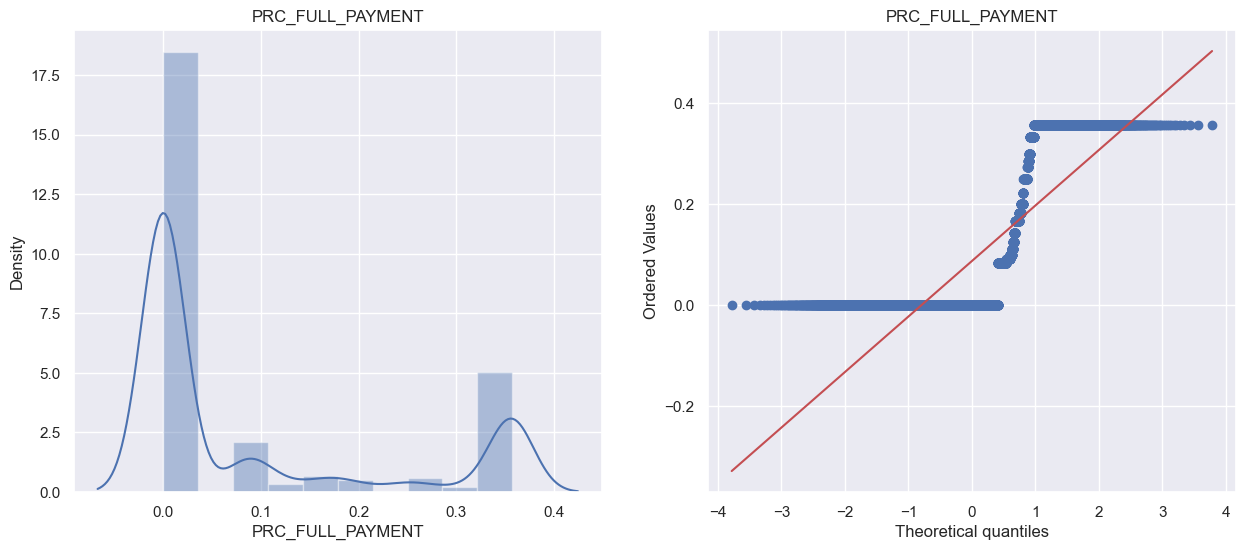

C:\Users\saiso\AppData\Local\Temp\ipykernel_27004\3632009477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


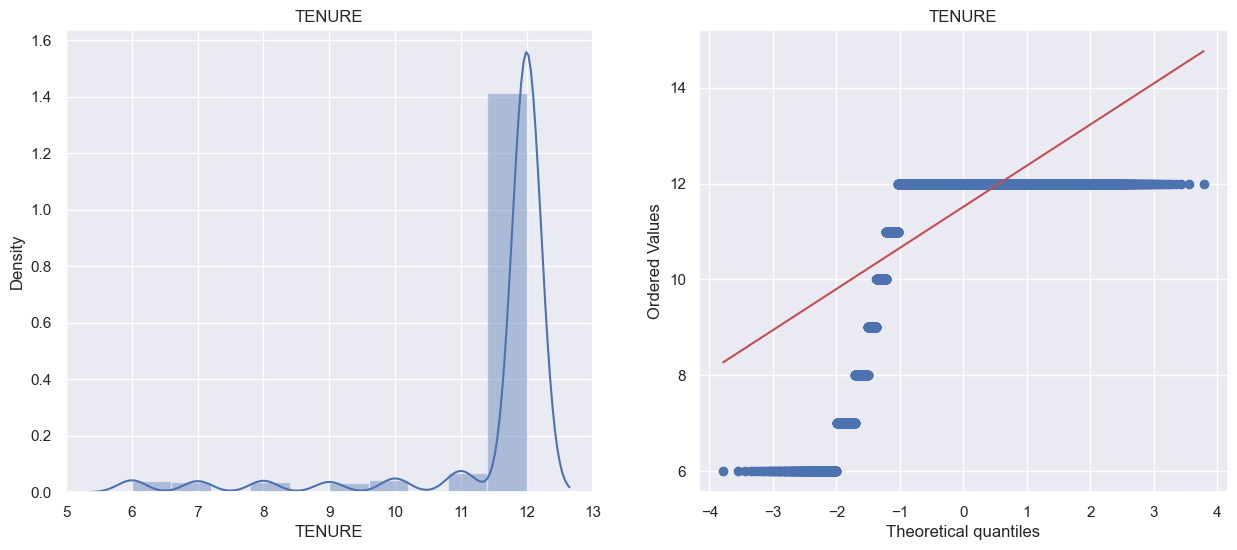

In [148]:
num_cols = df.select_dtypes(include=["int64","float64"])
def plots(num_cols, variable):
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  #num_cols[variable].hist()
  sns.distplot(num_cols[variable], kde=True, bins=10)
  plt.title(variable)
  plt.subplot(1, 2, 2)
  stats.probplot(num_cols[variable], dist="norm", plot=pylab)
  plt.title(variable)
  plt.show()
for i in num_cols.columns:
  plots(num_cols, i)

Feature Engineering

In [151]:
X = df.iloc[:,1:]
X.head()


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40            0.0000   
1  3202.467416           0.909091       0.00            0.0000   
2  2495.148862           1.000000     773.17          773.1700   
3  1666.670542           0.722223    1499.00         1443.5125   
4   817.714335           1.000000      16.00           16.0000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   2784.552848             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    0.750000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000               0.0            2.0        1000.0   
1                0.250000               4.0            0.0        7000.0   
2                0.000000               0.0           12.0        7500.0   
3                0.083333               1.0            1.0        7500.0   
4                0.000000               0.0            1.0        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

Normalizing Data

In [154]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [156]:
X

array([[-0.87782104, -1.02187519, -0.72968709, ..., -0.79404745,
        -0.62927738,  0.36067954],
       [ 1.1785459 , -0.2027079 , -0.83815959, ...,  0.83675109,
         0.9739614 ,  0.36067954],
       [ 0.71848713,  0.61645939,  0.04095652, ...,  0.05869355,
        -0.62927738,  0.36067954],
       ...,
       [-0.88920486, -0.88535181, -0.67397271, ..., -0.89385616,
         1.17436805, -4.12276757],
       [-0.89567082, -0.88535181, -0.83815959, ..., -0.94046866,
         1.17436805, -4.12276757],
       [-0.66200474, -1.88655177,  0.40489651, ..., -0.88359305,
        -0.62927738, -4.12276757]])

In [158]:
pca = PCA(n_components=2)
X_principle = pca.fit_transform(X)
X_principle = pd.DataFrame(X_principle,columns=["P1","P2"])
X_principle.head()


P1        P2
0 -1.624789 -2.381615
1 -2.158390  2.289497
2  1.198983  0.280708
3 -0.495849 -0.185931
4 -1.632622 -1.597279

In [160]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.31561234 0.23665552]


Model


KMean Model


In [164]:
wscc = []

In [166]:
for i in range(1,11):
  model_kmean = KMeans(n_clusters=i,init="k-means++",random_state=0)
  model_kmean.fit(X)
  wscc.append(model_kmean.inertia_)

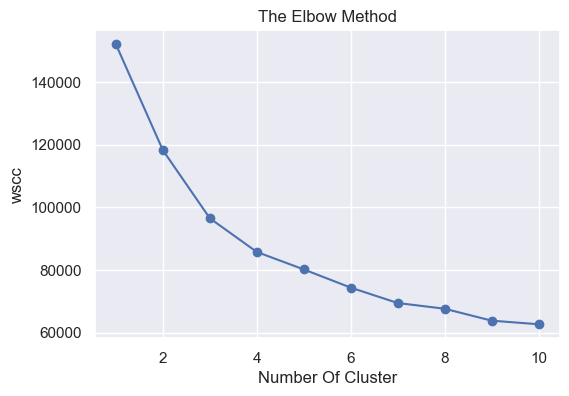

In [168]:
plt.plot(range(1,11),wscc, marker = 'o')
plt.title("The Elbow Method")
plt.xlabel("Number Of Cluster")
plt.ylabel("wscc")
plt.show()


In [170]:
model_kmean = KMeans(n_clusters=3,random_state=0).fit(X_principle)


In [172]:
y_cluster = model_kmean.predict(X_principle)

In [174]:
y_cluster

array([2, 1, 0, ..., 2, 2, 2])

In [176]:
silhouette_score(X_principle, y_cluster)

0.4309180447412748

In [178]:
X_principle

P1        P2
0    -1.624789 -2.381615
1    -2.158390  2.289497
2     1.198983  0.280708
3    -0.495849 -0.185931
4    -1.632622 -1.597279
...        ...       ...
8945  0.320141 -2.739866
8946 -0.131128 -1.803644
8947 -0.463207 -2.990444
8948 -2.418519 -2.466633
8949  0.180087 -0.908287

[8950 rows x 2 columns]

In [180]:
df_y_cluster = pd.concat([X_principle,pd.DataFrame({'cluster':y_cluster})],axis = 1)


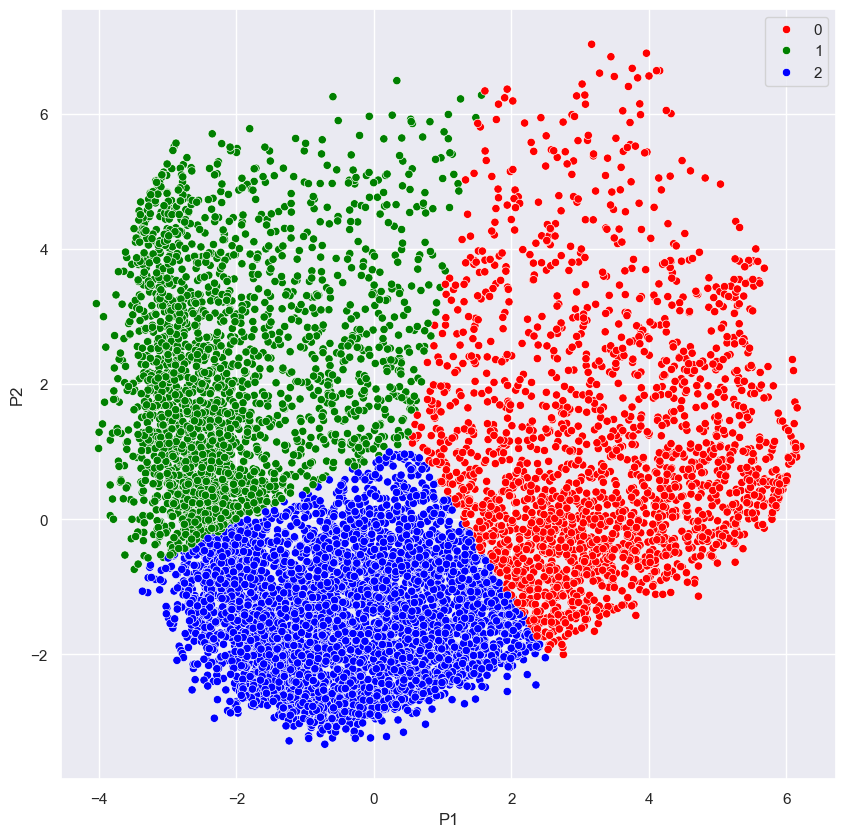

In [184]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="P1", y="P2", hue = y_cluster, data = X_principle,palette =['red','green','blue'])
plt.show()

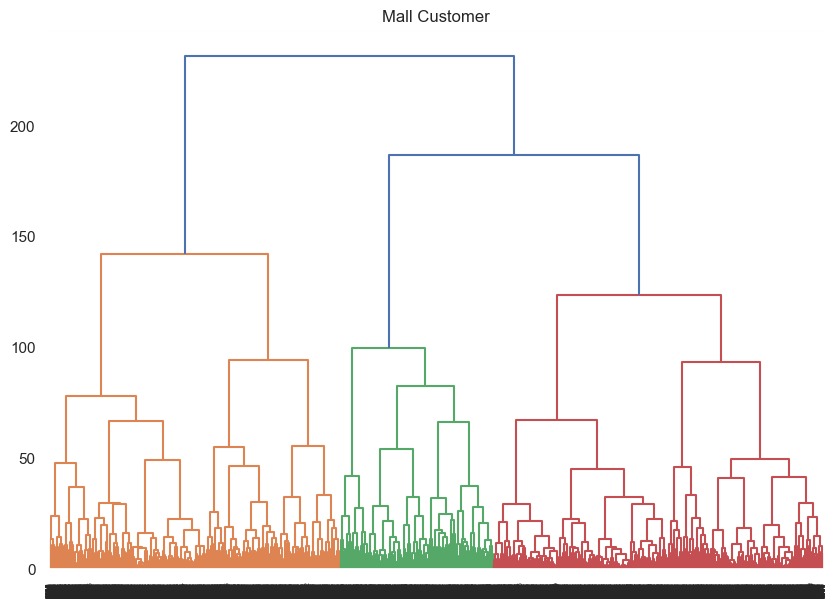

In [186]:
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.title("Mall Customer")
dend = dendrogram(linkage(X,method="ward"))

In [188]:
X_principle

P1        P2
0    -1.624789 -2.381615
1    -2.158390  2.289497
2     1.198983  0.280708
3    -0.495849 -0.185931
4    -1.632622 -1.597279
...        ...       ...
8945  0.320141 -2.739866
8946 -0.131128 -1.803644
8947 -0.463207 -2.990444
8948 -2.418519 -2.466633
8949  0.180087 -0.908287

[8950 rows x 2 columns]

<Axes: ylabel='count'>

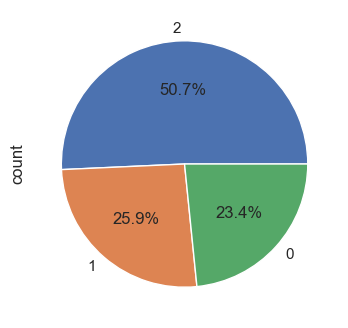

In [190]:
 df_y_cluster["cluster"].value_counts().plot.pie(autopct= '%.1f%%')

Agglomerative Clustering

In [195]:
model_agg = AgglomerativeClustering(n_clusters=3).fit(X_principle)


In [197]:
y_pred = model_agg.labels_
y_pred


array([0, 2, 0, ..., 0, 0, 0], dtype=int64)

In [199]:
silhouette_score(X_principle, y_pred)

0.40260453891547343

In [201]:
df_y_cluster


P1        P2  cluster
0    -1.624789 -2.381615        2
1    -2.158390  2.289497        1
2     1.198983  0.280708        0
3    -0.495849 -0.185931        2
4    -1.632622 -1.597279        2
...        ...       ...      ...
8945  0.320141 -2.739866        2
8946 -0.131128 -1.803644        2
8947 -0.463207 -2.990444        2
8948 -2.418519 -2.466633        2
8949  0.180087 -0.908287        2

[8950 rows x 3 columns]

In [203]:
df_y_cluster = pd.concat([df_y_cluster,pd.DataFrame({'label':y_pred})], axis =1)

In [205]:
df_y_cluster


P1        P2  cluster  label
0    -1.624789 -2.381615        2      0
1    -2.158390  2.289497        1      2
2     1.198983  0.280708        0      0
3    -0.495849 -0.185931        2      0
4    -1.632622 -1.597279        2      0
...        ...       ...      ...    ...
8945  0.320141 -2.739866        2      0
8946 -0.131128 -1.803644        2      0
8947 -0.463207 -2.990444        2      0
8948 -2.418519 -2.466633        2      0
8949  0.180087 -0.908287        2      0

[8950 rows x 4 columns]

<Axes: ylabel='count'>

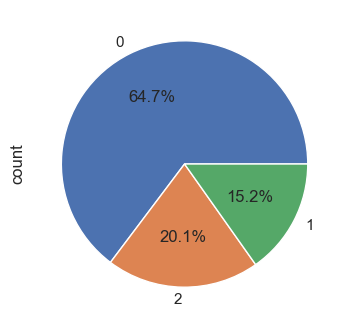

In [207]:
df_y_cluster["label"].value_counts().plot.pie(autopct= '%.1f%%')

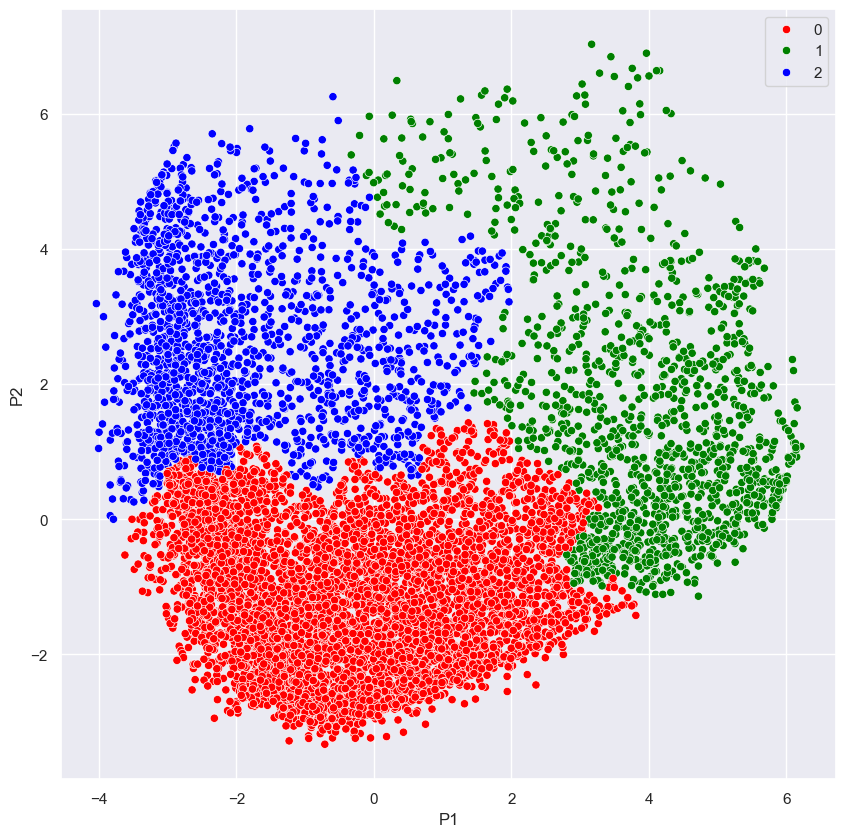

In [209]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="P1", y="P2", hue = y_pred, data = X_principle, palette=['red','green','blue'])
plt.show()